## Hospital Rating Classification (Capstone Project)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import set_config

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline, Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
set_config(display="diagram")

<hr style="border: 2px solid red; border-radius: 50%;">

### Creating Helper Functions.

In [3]:
def display_scrollable_html(html_content):
    """
    Display scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - html_content (str): The HTML content to be displayed.
    """
    display(HTML(html_content))

# Example with DataFrame
def display_dataframe_as_html(df):
    """
    Convert DataFrame to HTML and display it as scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - df (pandas.DataFrame): The DataFrame to be displayed.
    """
    html_content = df.to_html()
    display_scrollable_html(html_content)

# Example with Series
def display_series_as_html(series):
    """
    Convert Series to HTML and display it as scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - series (pandas.Series): The Series to be displayed.
    """
    html_content = series.to_frame().to_html()
    display_scrollable_html(html_content)

# Example with list
def display_list_as_html(lst):
    """
    Convert list to HTML and display it as scrollable HTML content in Jupyter Notebook.
    
    Parameters:
    - lst (list): The list to be displayed.
    """
    html_content = "<ul>"
    for item in lst:
        html_content += "<li>{}</li>".format(item)
    html_content += "</ul>"v
    display_scrollable_html(html_content)

<hr style="border: 2px solid red; border-radius: 50%;">

## Importing the dataset

In [4]:
df = pd.read_csv('hospital-info.csv')

<hr style="border: 2px solid red; border-radius: 50%;">

## Understanding the Data.

<hr style="border: 1px solid yellow; border-radius: 50%;">

### 1. How big is the data?

In [5]:
df.shape

(3057, 94)

The data has 3057 rows and 94 columns.

<hr style="border: 1px solid yellow; border-radius: 50%;">

### 2. How does the data look like?

In [6]:
df.head()

Provider ID                     Hospital Name                     Address  \
0        10001  SOUTHEAST ALABAMA MEDICAL CENTER      1108 ROSS CLARK CIRCLE   
1        10005     MARSHALL MEDICAL CENTER SOUTH  2505 U S HIGHWAY 431 NORTH   
2        10006    ELIZA COFFEE MEMORIAL HOSPITAL          205 MARENGO STREET   
3        10007          MIZELL MEMORIAL HOSPITAL               702 N MAIN ST   
4        10008       CRENSHAW COMMUNITY HOSPITAL         101 HOSPITAL CIRCLE   

       City State  ZIP Code County Name  Phone Number Hospital Ownership  \
0    DOTHAN    AL     36301     HOUSTON    3347938701         Government   
1      BOAZ    AL     35957    MARSHALL    2565938310         Government   
2  FLORENCE    AL     35631  LAUDERDALE    2567688400         Government   
3       OPP    AL     36467   COVINGTON    3344933541          Voluntary   
4   LUVERNE    AL     36049    CRENSHAW    3343353374             Others   

  Emergency Services  ...  SAFETY_HAI_3_SIR_Score  SAFETY_HAI_4_SIR_Score  \
0                Yes  ...                -1.87000               -0.000000   
1                Yes  ...                -0.38600               -0.871177   
2                Yes  ...                -0.31000               -0.871177   
3                Yes  ...                -0.96398               -0.871177   
4                Yes  ...                -0.96398               -0.871177   

   SAFETY_HAI_5_SIR_Score  SAFETY_HAI_6_SIR_Score  MED_OP_10_Score  \
0               -0.422000                  -0.787             -6.4   
1               -1.388000                  -0.405            -13.3   
2               -1.261000                  -0.513            -11.8   
3               -0.987212                  -0.000            -24.3   
4               -0.987212                  -0.585             -3.6   

   MED_OP_11_Score  MED_OP_13_Score  MED_OP_14_Score  MED_OP_8_Score  \
0        -0.900000        -7.100000        -2.400000      -38.100000   
1       -10.200000        -5.300000        -4.000000      -42.800000   
2        -4.600000        -0.000000        -4.600000      -45.600000   
3        -6.100000        -4.716942        -2.964405      -39.964766   
4        -2.936245        -4.716942        -0.600000      -39.964766   

   MED_OP_9_Score  
0            -6.9  
1            -5.1  
2            -9.1  
3           -20.7  
4            -8.2  

[5 rows x 94 columns]

#### Get random rows to avoid bias.

Sometimes there are same type of data at the head or tail. IMO it's better approach to see random rows.

<hr style="border: 1px solid yellow; border-radius: 50%;">

In [7]:
df.sample(5)

Provider ID                    Hospital Name  \
1694       310052             OCEAN MEDICAL CENTER   
1363       230080         MCLAREN CENTRAL MICHIGAN   
2462       440025  LAUGHLIN MEMORIAL HOSPITAL, INC   
2776       460021    DIXIE REGIONAL MEDICAL CENTER   
602        100087       SARASOTA MEMORIAL HOSPITAL   

                             Address            City State  ZIP Code  \
1694            425 JACK MARTIN BLVD           BRICK    NJ      8724   
1363                1221 SOUTH DRIVE  MOUNT PLEASANT    MI     48858   
2462              1420 TUSCULUM BLVD     GREENEVILLE    TN     37745   
2776  1380 EAST MEDICAL CENTER DRIVE       ST GEORGE    UT     84790   
602               1700 S TAMIAMI TRL        SARASOTA    FL     34239   

     County Name  Phone Number Hospital Ownership Emergency Services  ...  \
1694       OCEAN    7328402200          Voluntary                Yes  ...   
1363    ISABELLA    9897726700          Voluntary                Yes  ...   
2462      GREENE    4237875000          Voluntary                Yes  ...   
2776  WASHINGTON    4352512100          Voluntary                Yes  ...   
602     SARASOTA    9419179000         Government                Yes  ...   

      SAFETY_HAI_3_SIR_Score  SAFETY_HAI_4_SIR_Score  SAFETY_HAI_5_SIR_Score  \
1694                -0.41000               -0.871177               -1.423000   
1363                -0.96398               -0.871177               -0.987212   
2462                -0.00000               -0.871177               -0.987212   
2776                -0.19900               -0.871177               -2.085000   
602                 -0.62100               -0.687000               -0.534000   

      SAFETY_HAI_6_SIR_Score  MED_OP_10_Score  MED_OP_11_Score  \
1694                  -0.846             -6.5             -2.6   
1363                  -0.000             -9.9            -11.7   
2462                  -0.260             -9.2             -4.2   
2776                  -0.951             -7.2             -0.6   
602                   -0.971             -8.9             -2.7   

      MED_OP_13_Score  MED_OP_14_Score  MED_OP_8_Score  MED_OP_9_Score  
1694            -10.3        -2.700000      -39.964766           -17.8  
1363             -2.2        -2.964405      -39.964766            -5.6  
2462             -5.5        -2.964405      -47.600000           -17.2  
2776             -3.2        -3.400000      -44.300000            -4.7  
602              -4.6        -3.800000      -44.500000            -8.2  

[5 rows x 94 columns]

<hr style="border: 1px solid yellow; border-radius: 50%;">

### 3. What is the data type of cols?

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

<hr style="border: 1px solid yellow; border-radius: 50%;">

### 4. Are there any missing values?

In [9]:
display_series_as_html(df.isnull().sum() / df.shape[0])

<hr style="border: 1px solid yellow; border-radius: 50%;">

### 5. How does the data look mathematically?

#### Helper Function to describe categorical data.

In [10]:
def describe_categorical_data(df):
    # Select only categorical columns
    cat_columns = df.select_dtypes(include=['object', 'category'])

    # Initialize an empty list to store summary statistics
    summary_stats = []

    # Loop through each categorical column
    for column in cat_columns:
        unique_values = df[column].nunique()  # Count unique values
        most_common = df[column].mode().iloc[0]  # Most common value
        frequency = df[column].value_counts().iloc[0]  # Frequency of the most common value

        # Append summary statistics to the list
        summary_stats.append({
            'Column': column,
            'Unique Values': unique_values,
            'Most Common': most_common,
            'Frequency': frequency
        })

    # Convert the list of dictionaries to a DataFrame
    summary_stats_df = pd.DataFrame(summary_stats)

    return summary_stats_df


<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Numerical Data

In [11]:
display_dataframe_as_html(df.describe().T)

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Categorical Data.

In [12]:
display_dataframe_as_html(describe_categorical_data(df))

<hr style="border: 1px solid yellow; border-radius: 50%;">

### 6. Are there duplicate values?

In [13]:
df.duplicated().sum()

0

<hr style="border: 1px solid yellow; border-radius: 50%;">

### 7. How is the correlation between cols?

In [14]:
display_series_as_html(df.corr(numeric_only=True)['Hospital overall rating'].sort_values(ascending=False))

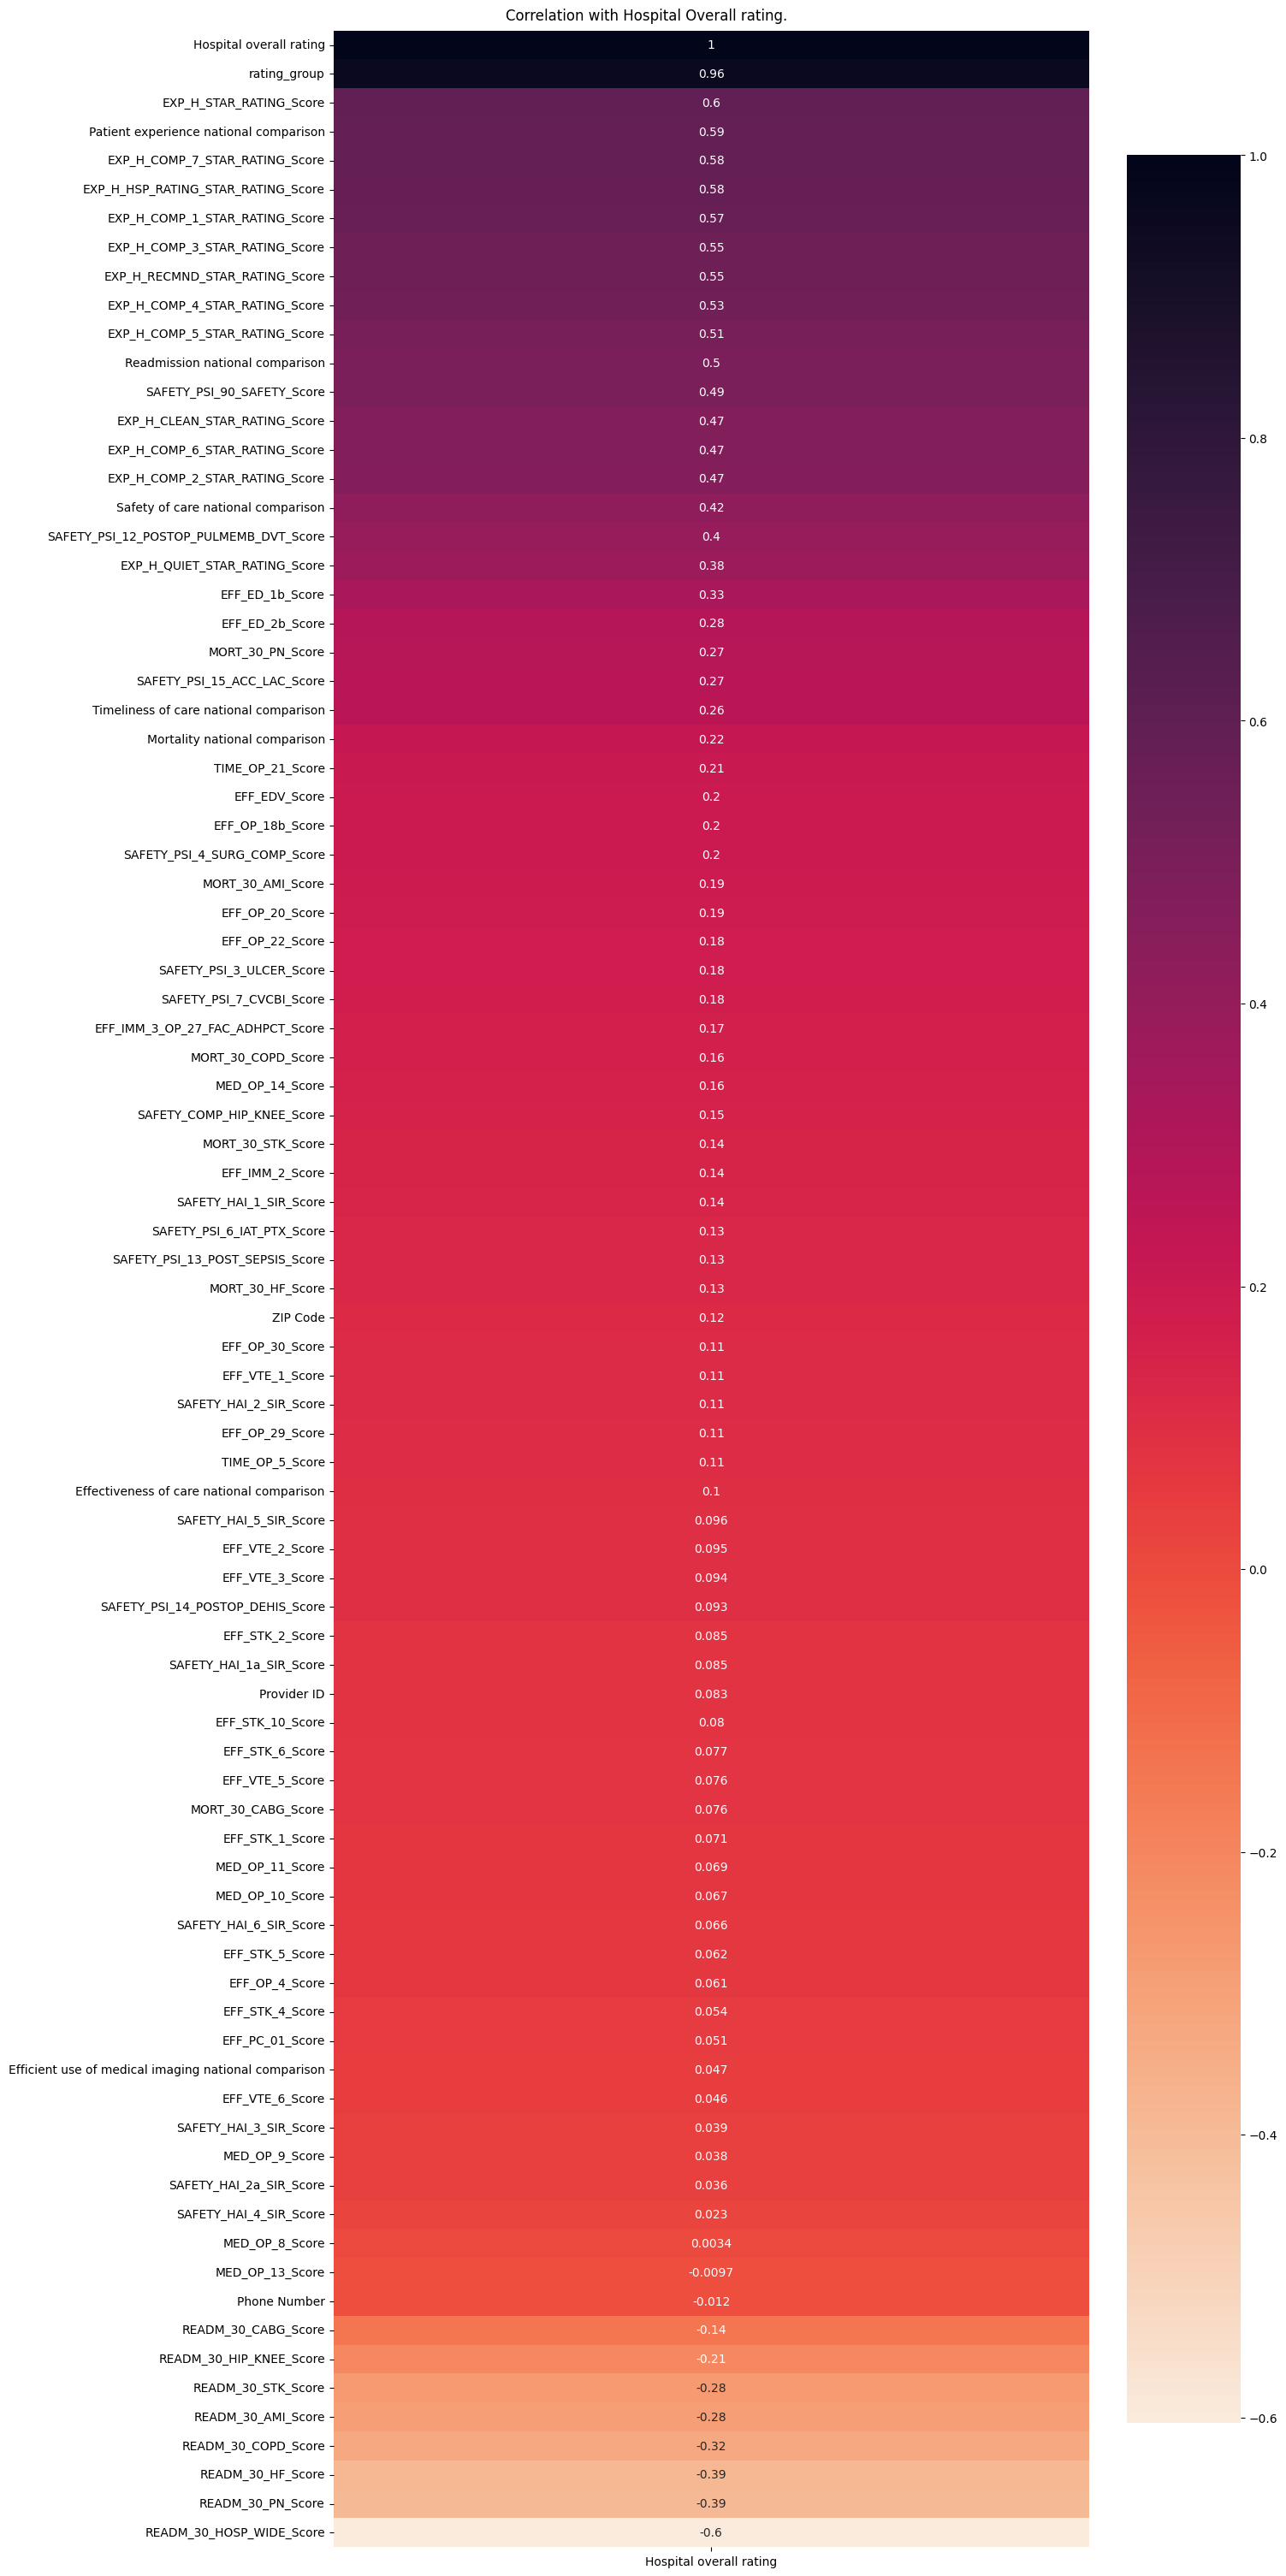

In [15]:
fig, ax = plt.subplots(figsize=(15, 30), constrained_layout=True)
sns.heatmap(df.corr(numeric_only=True)['Hospital overall rating'].sort_values(ascending=False).to_frame(), annot=True, ax=ax, cmap=sns.color_palette("rocket_r", as_cmap=True))
fig.suptitle("Correlation with Hospital Overall rating.")
plt.show()

<hr style="border: 2px solid red; border-radius: 50%;">

## Exploring the Dataset.

### Univariate Analysis.

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### 1. Categorical Data

In [16]:
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

<hr style="border: 1px solid yellow; border-radius: 50%;">

##### a. Countplot

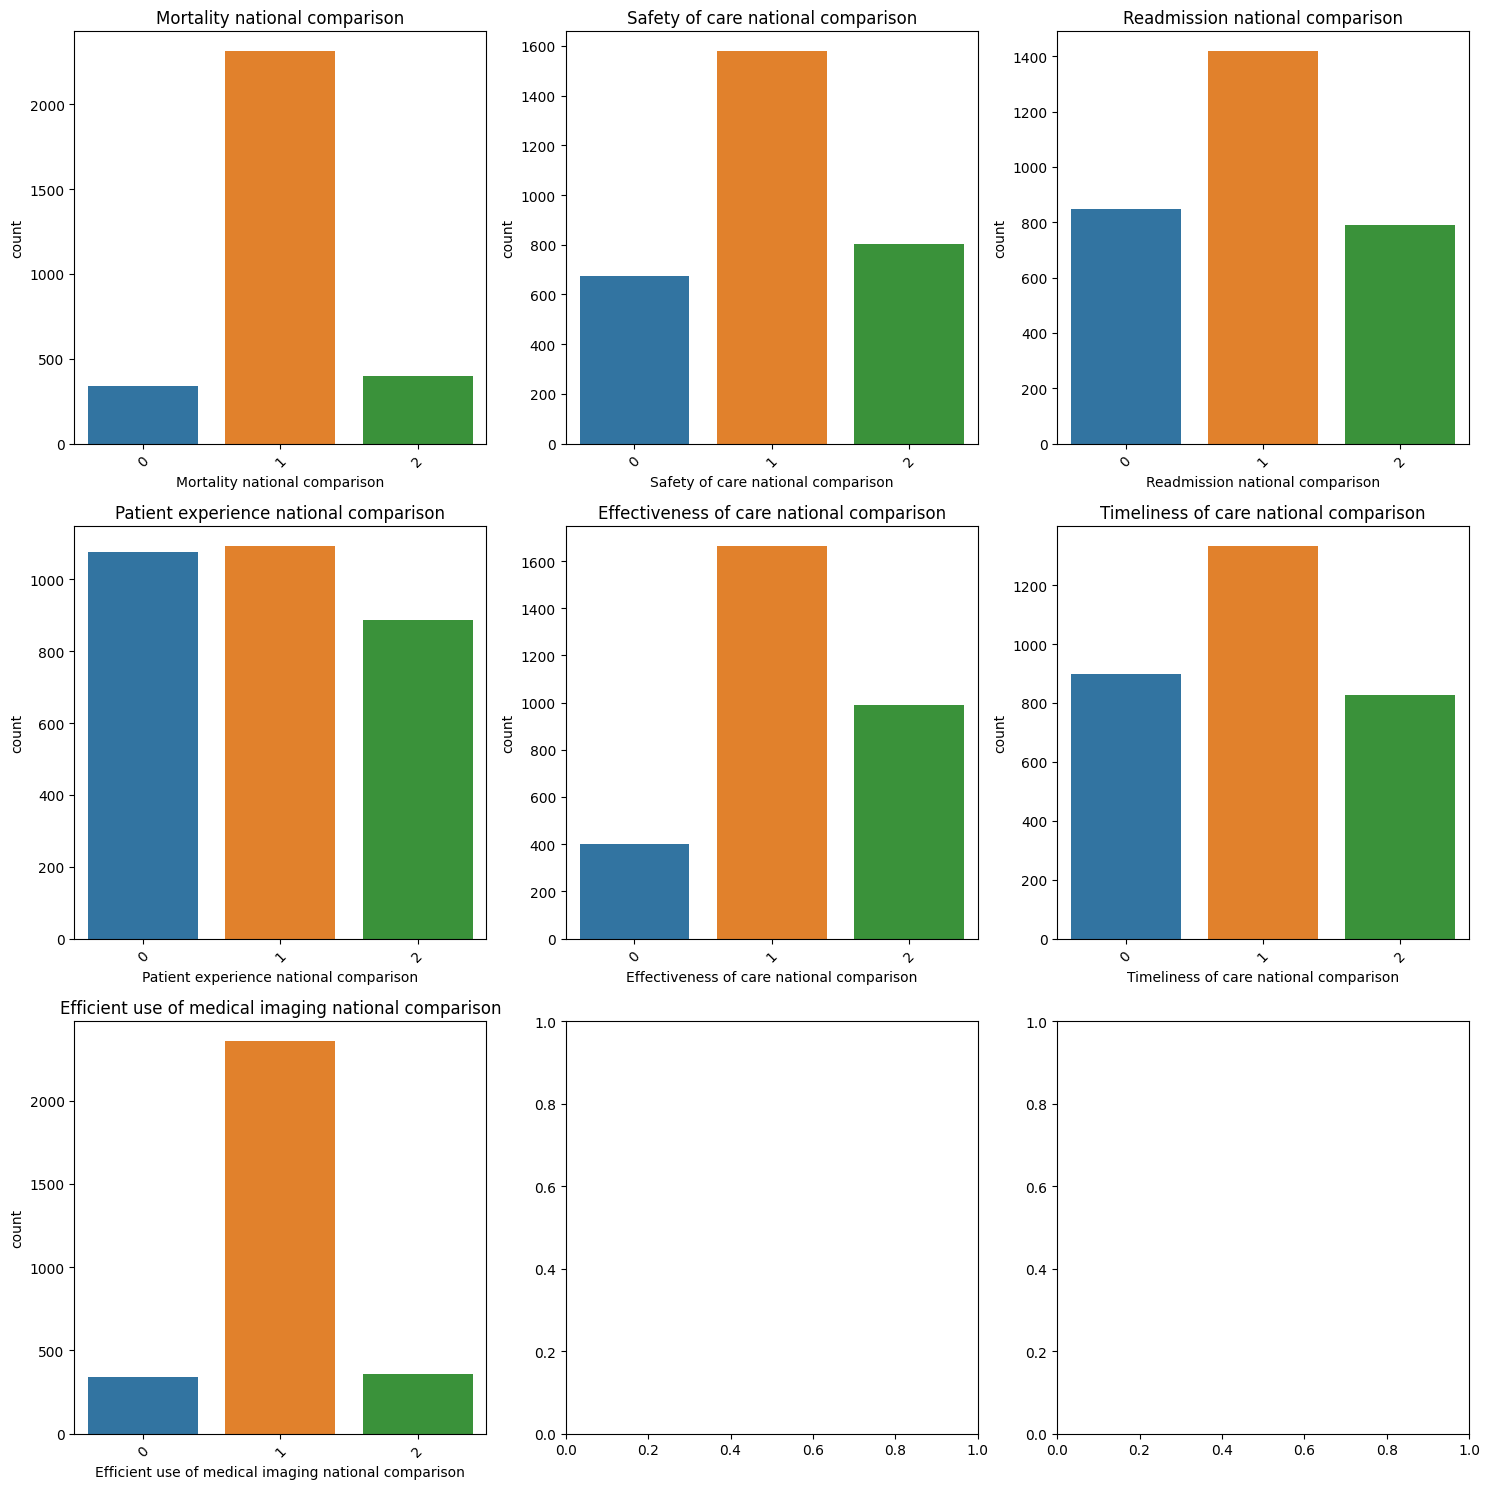

In [17]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a countplot
for i, feature in enumerate(features):
    # Create the countplot for the current feature
    sns.countplot(x=feature, data=df, ax=axes[i])
    
    # Set the title for the subplot
    axes[i].set_title(feature)
    
    # Rotate x-axis labels for better readability if needed
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()
    

<hr style="border: 1px solid yellow; border-radius: 50%;">

##### B. pie chart

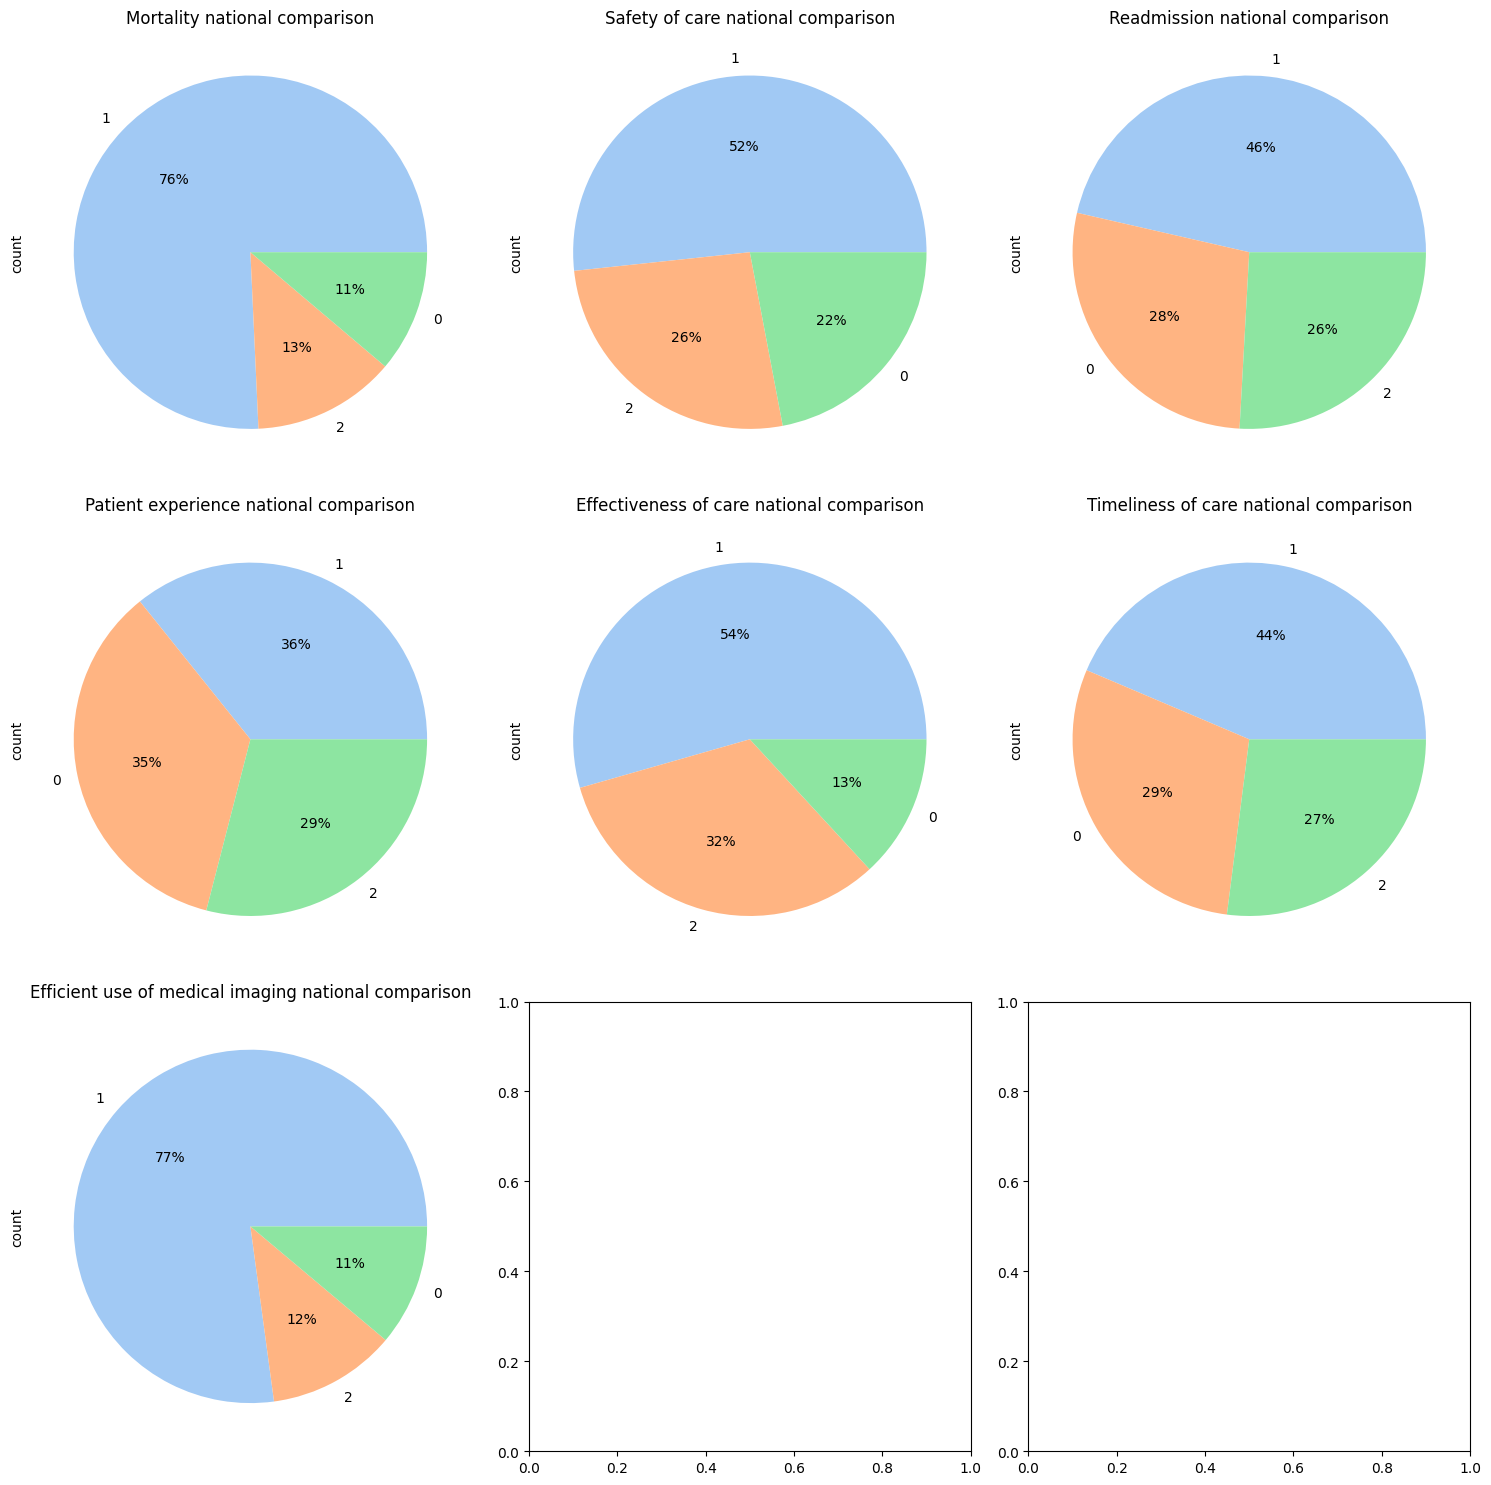

In [18]:
#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:5]

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each feature and create a countplot
for i, feature in enumerate(features):
    ax = df[feature].value_counts().plot(kind='pie', colors=colors, autopct='%.0f%%', ax=axes[i])
    
    ax.set_title(feature)
    
    # Rotate x-axis labels for better readability if needed
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### 2. Numerical Data

### Grouping the Measures with their subset.

In [19]:
measures =  ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [20]:
read_mission_cols =  df.columns[df.columns.str.startswith('READM_')].to_list()

mortality_cols =  df.columns[df.columns.str.startswith('MORT_')].to_list()

timeliness_cols = df.columns[df.columns.str.startswith('TIME_')].to_list()

eff_care_cols = df.columns[df.columns.str.startswith('EFF_')].to_list()

experience_cols =  df.columns[df.columns.str.startswith('EXP_')].to_list()

safety_cols =  df.columns[df.columns.str.startswith('SAFETY_')].to_list()

med_img_cols = df.columns[df.columns.str.startswith('MED_')].to_list()

<hr style="border: 1px solid yellow; border-radius: 50%;">

### a. Histogram

In [21]:
# Define the columns for each measure
measure_columns = {
    'Mortality': mortality_cols,
    'Readmission': read_mission_cols,
    'Timeliness': timeliness_cols,
    'Effectiveness of Care': eff_care_cols,
    'Patient Experience': experience_cols,
    'Safety of Care': safety_cols,
    'Medical Imaging': med_img_cols
}

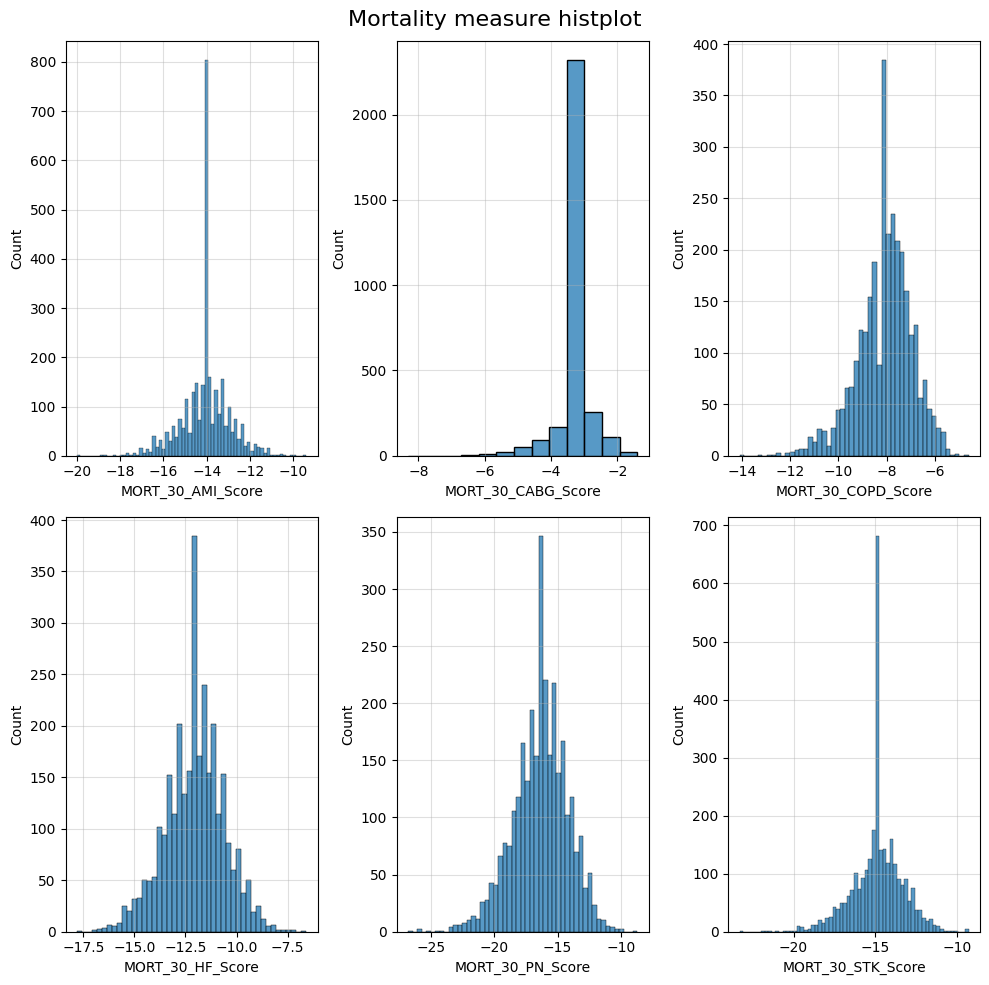

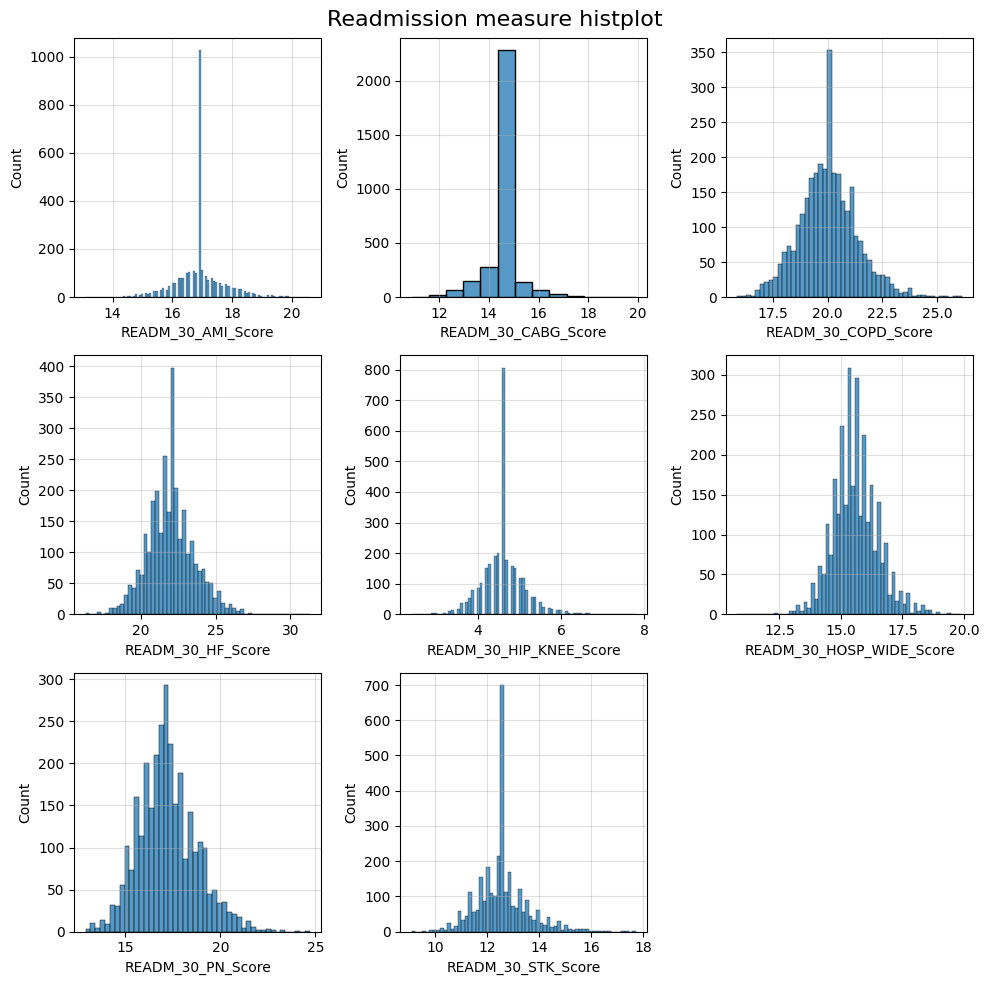

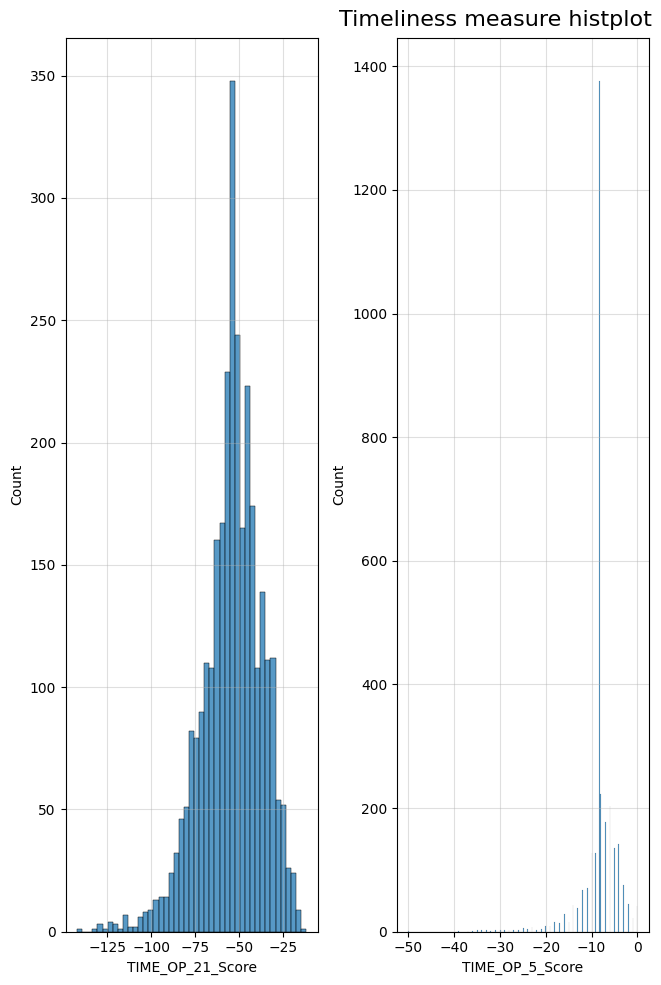

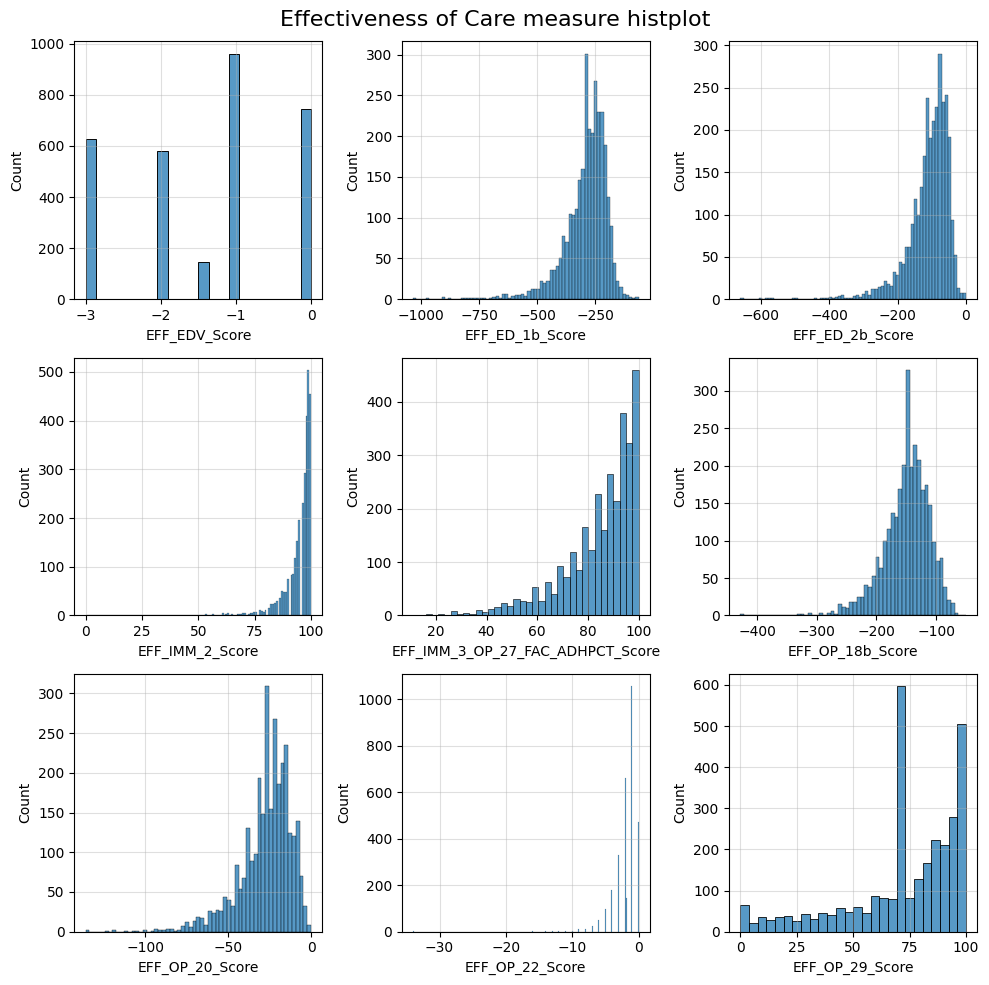

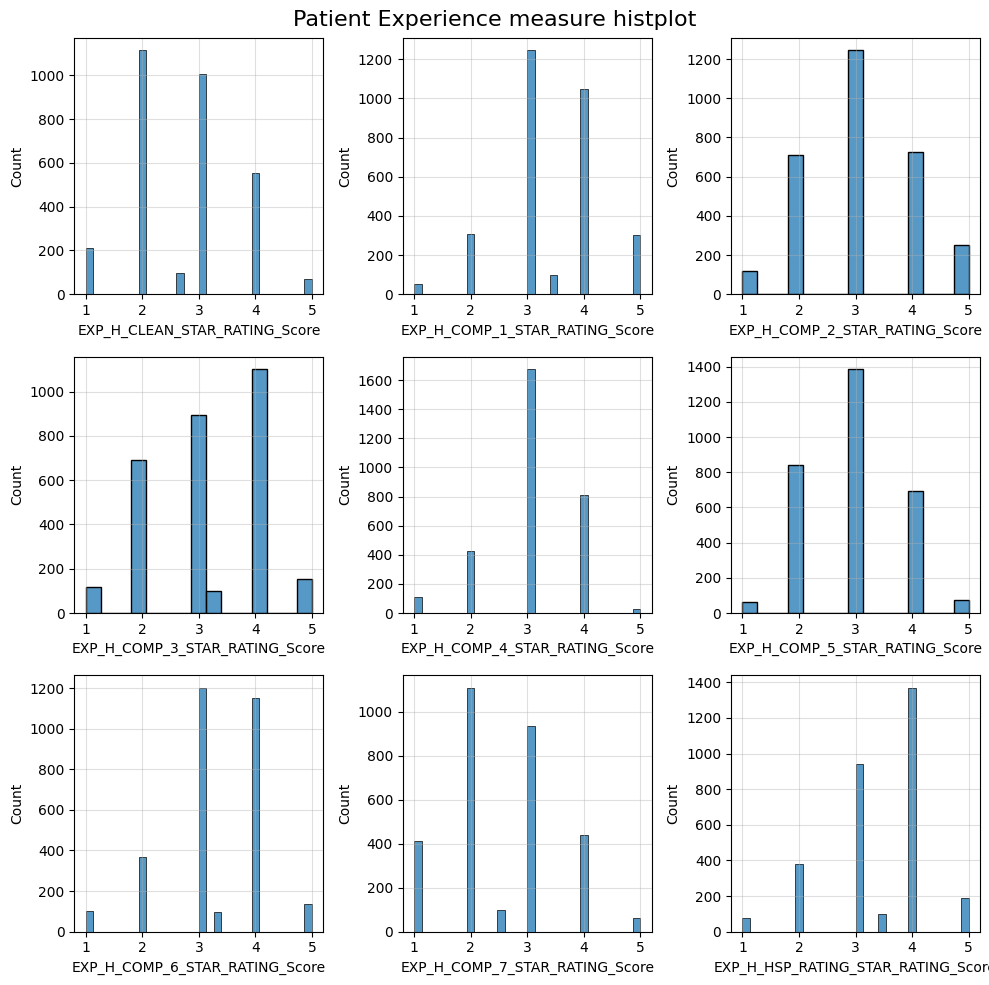

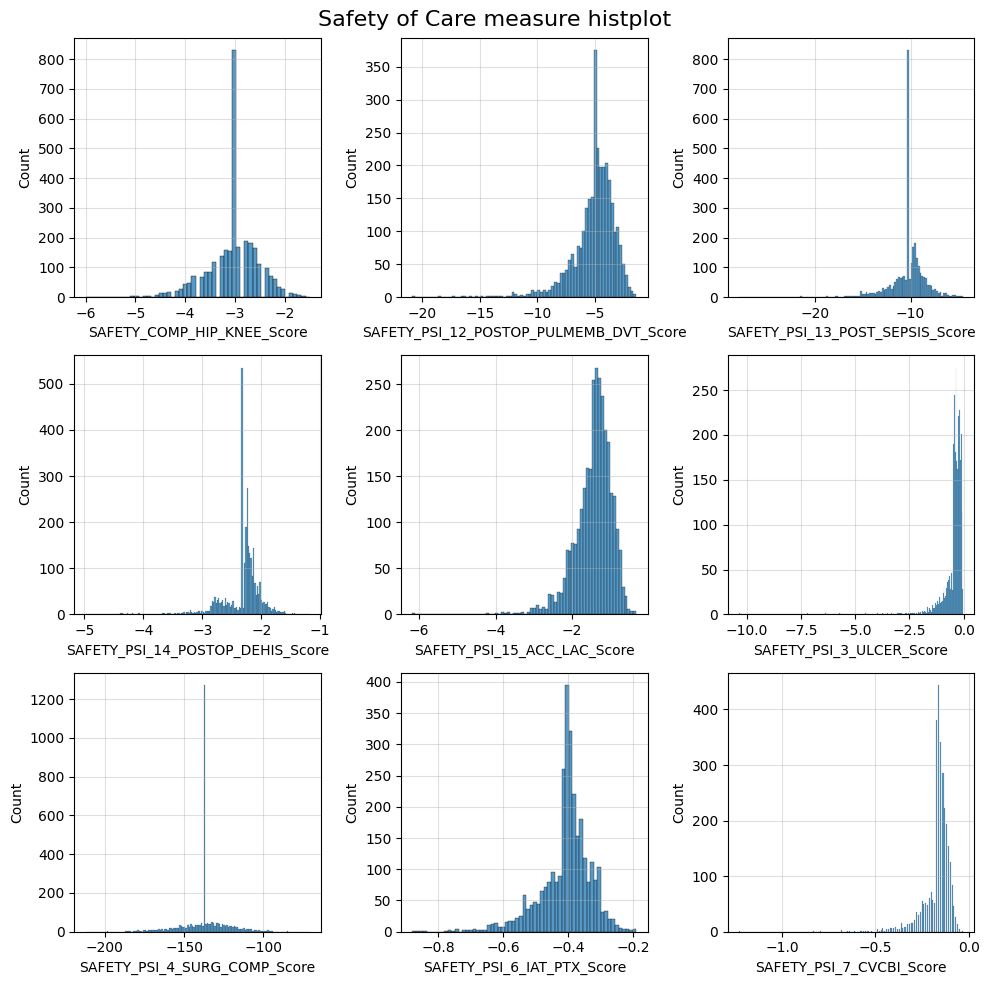

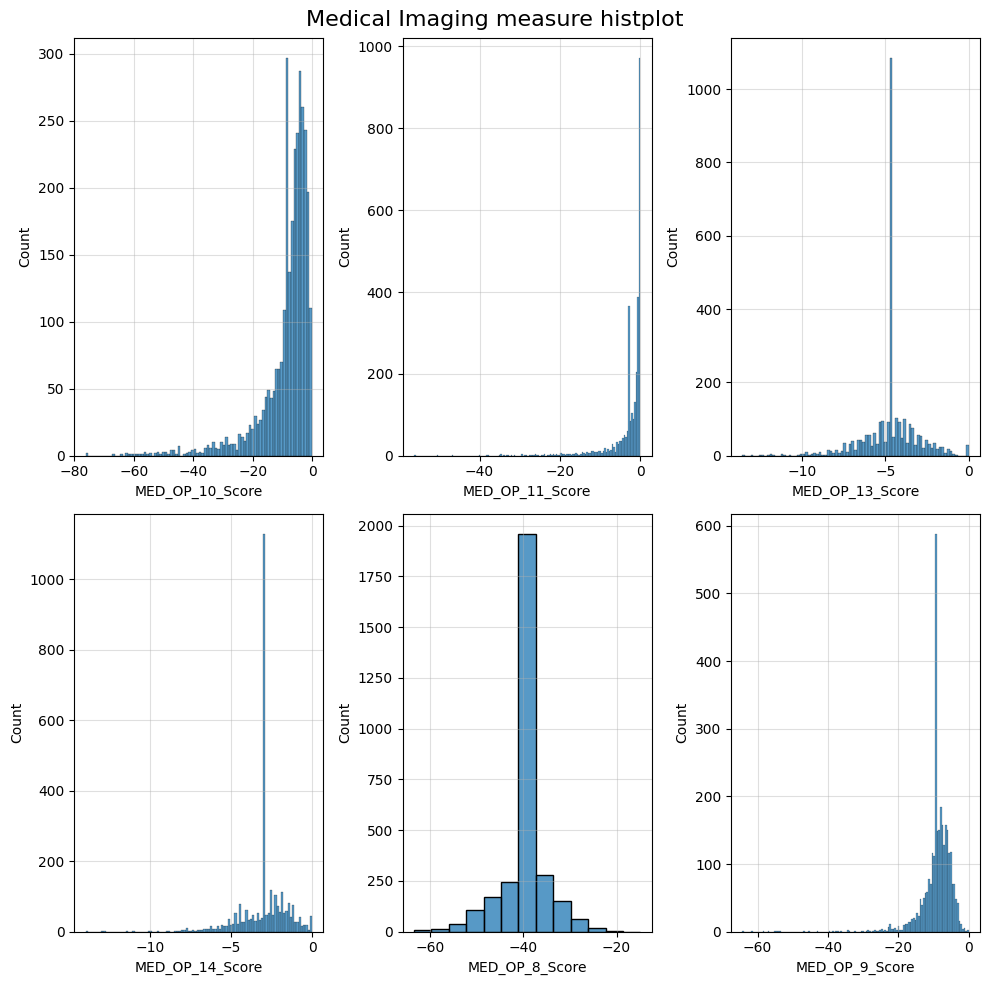

In [22]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.histplot(df[col])
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure histplot', fontsize=16)
    plt.show()

<hr style="border: 1px solid yellow; border-radius: 50%;">

### b. KDE plot

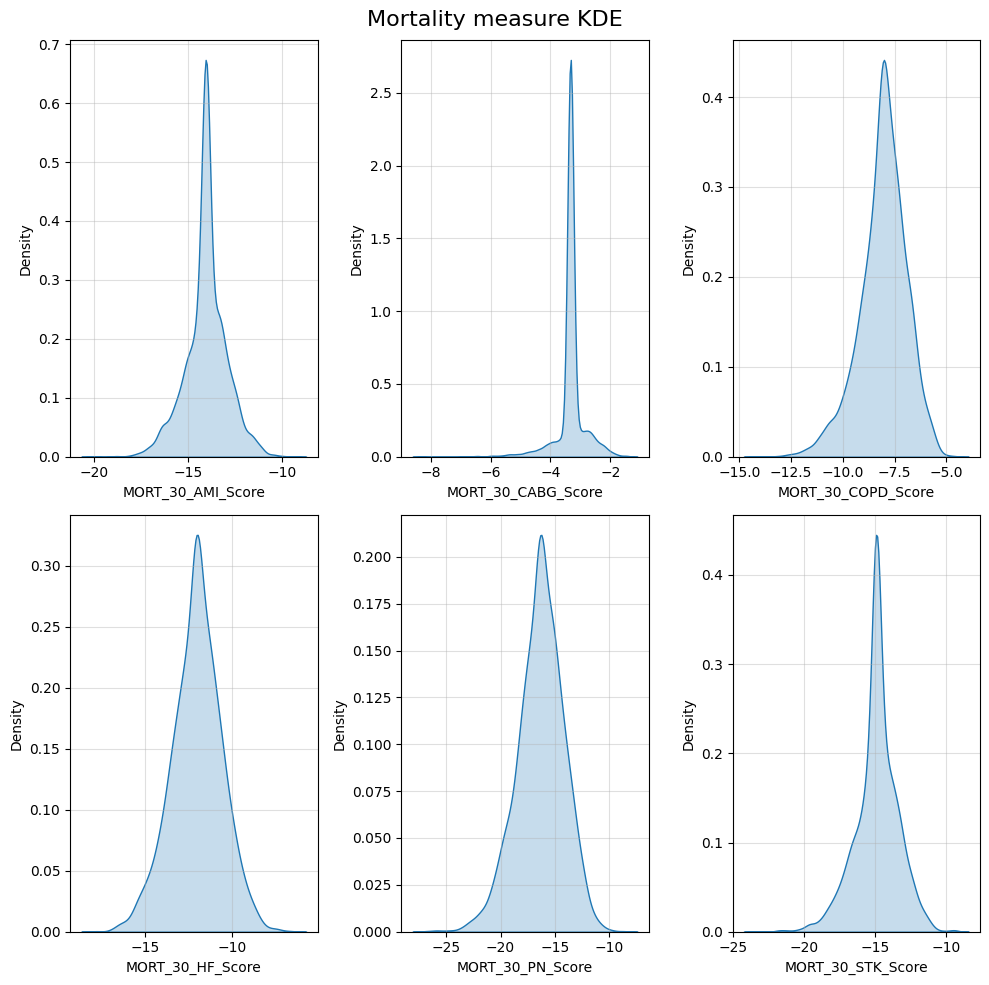

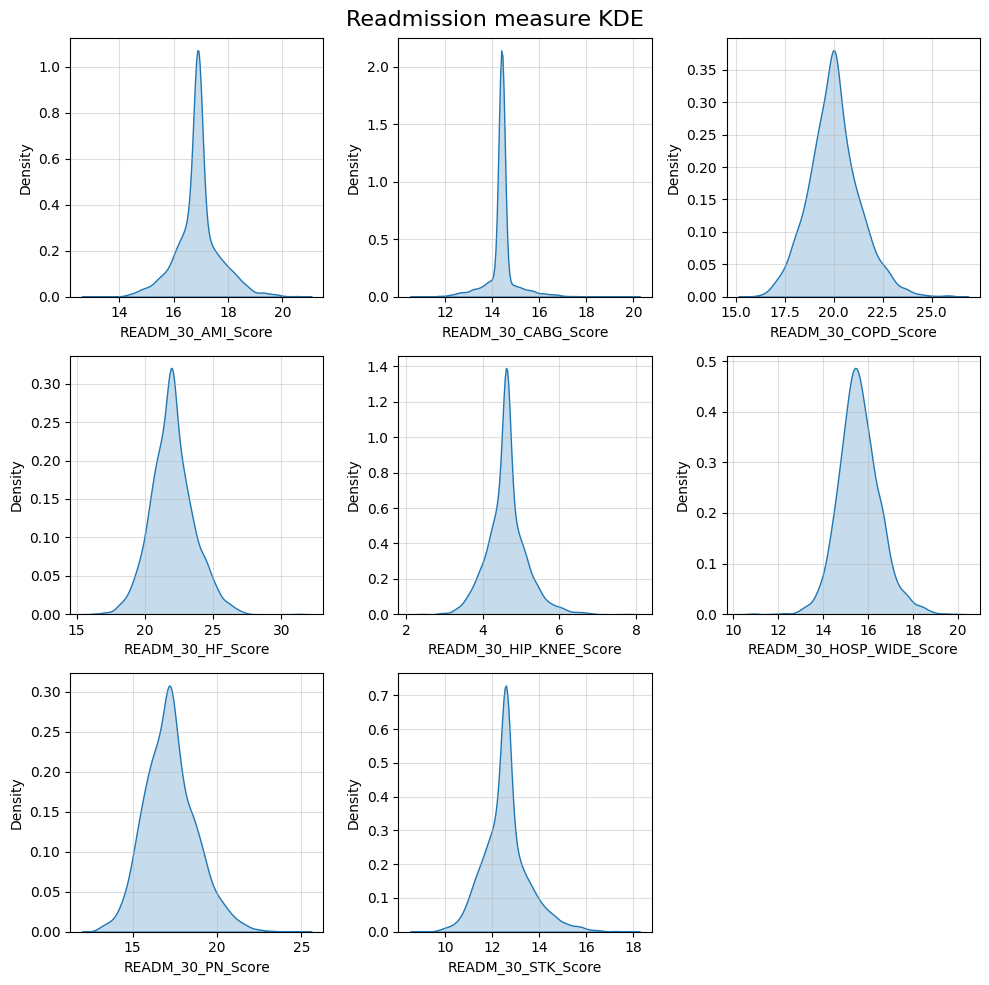

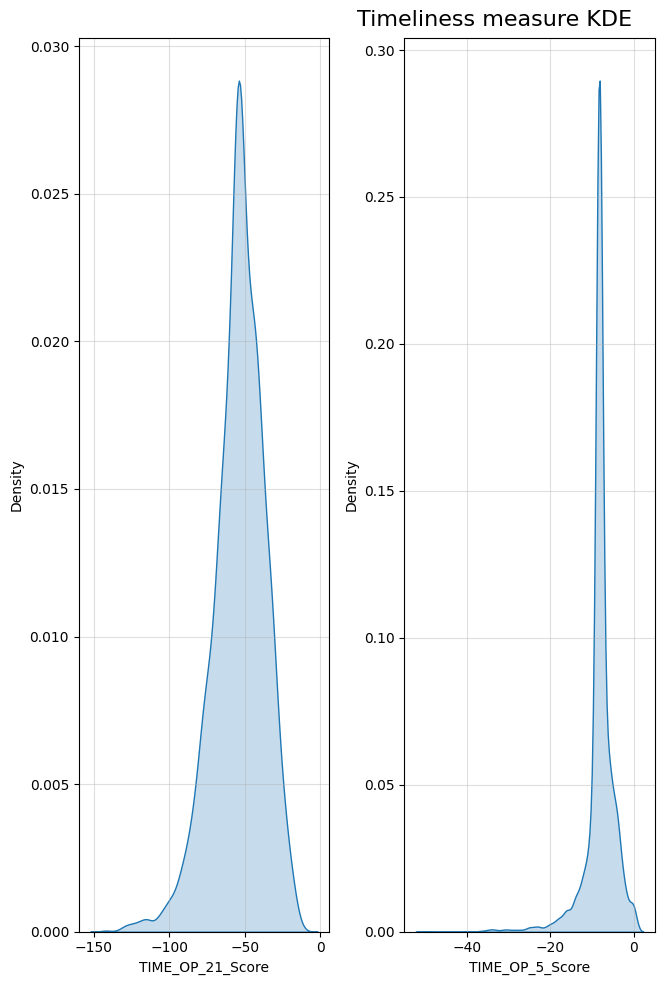

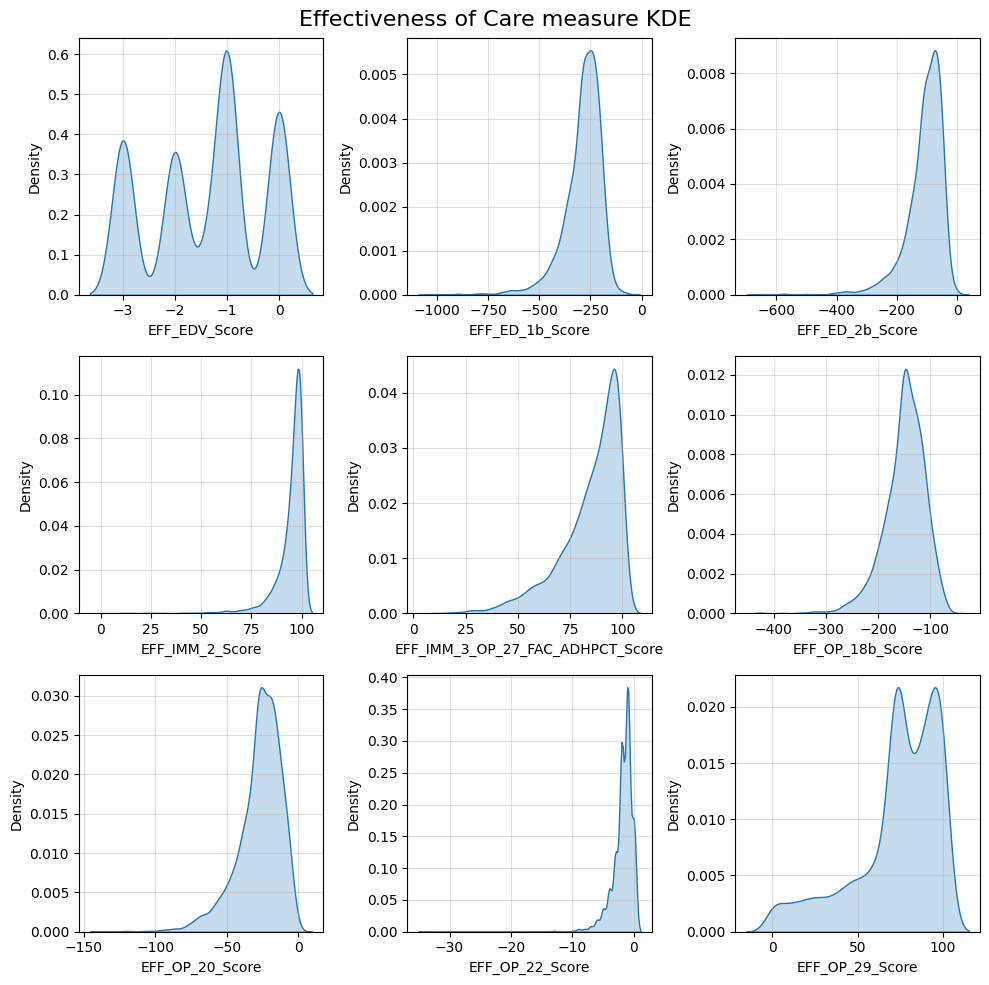

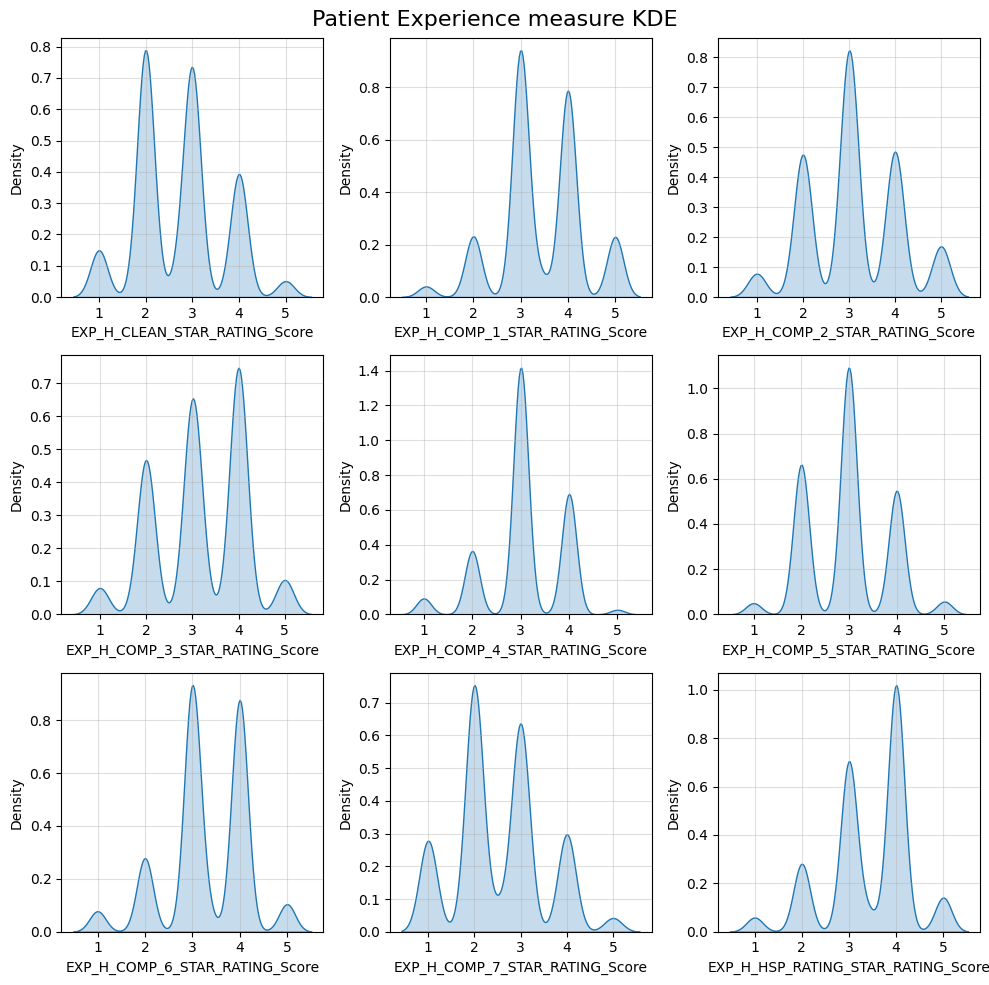

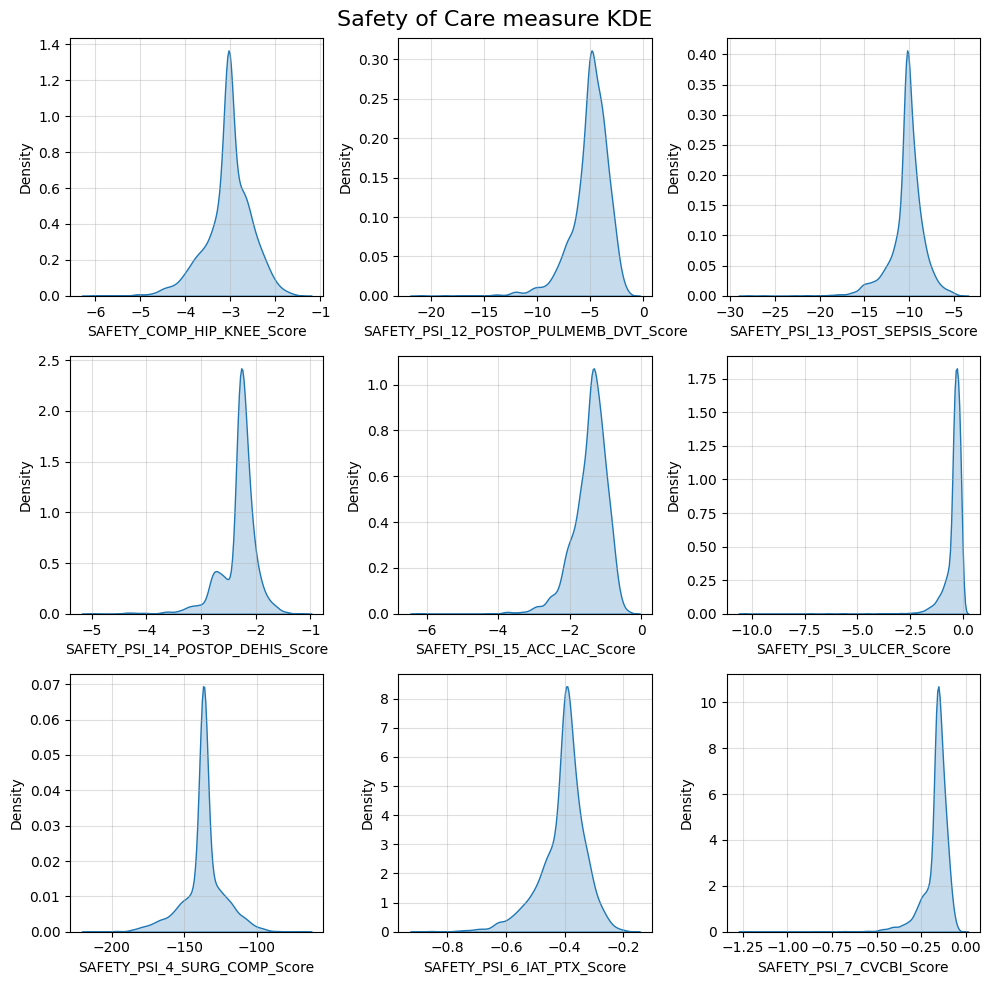

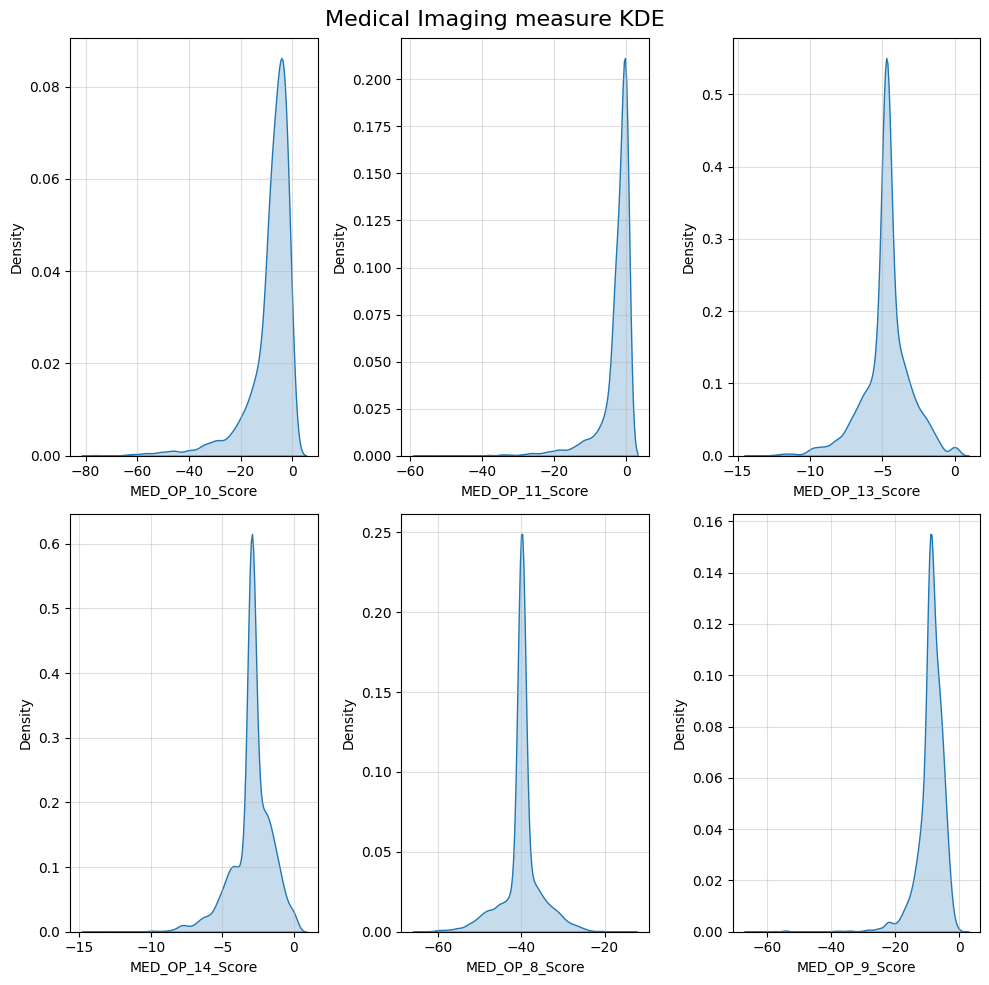

In [23]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.kdeplot(df[col], fill=True)
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure KDE', fontsize=16)
    plt.show()

<hr style="border: 1px solid yellow; border-radius: 50%;">

### c. Boxplot

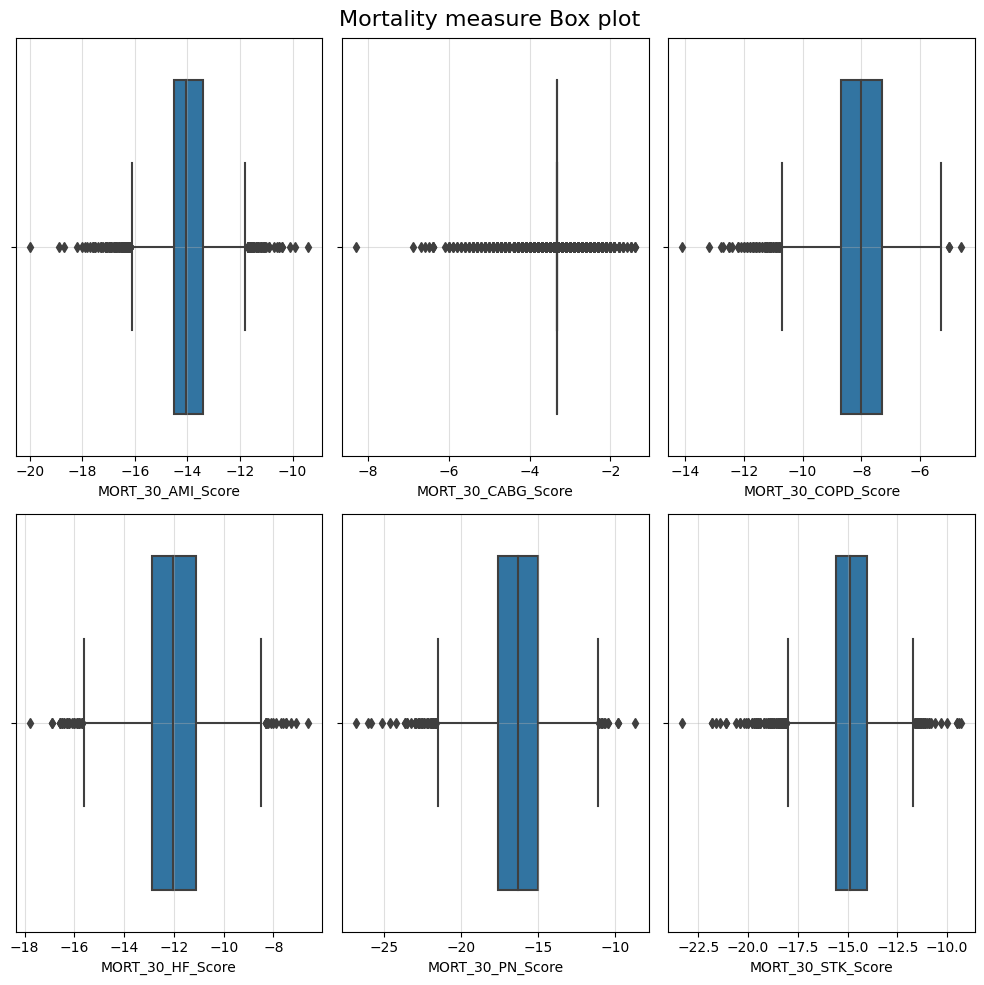

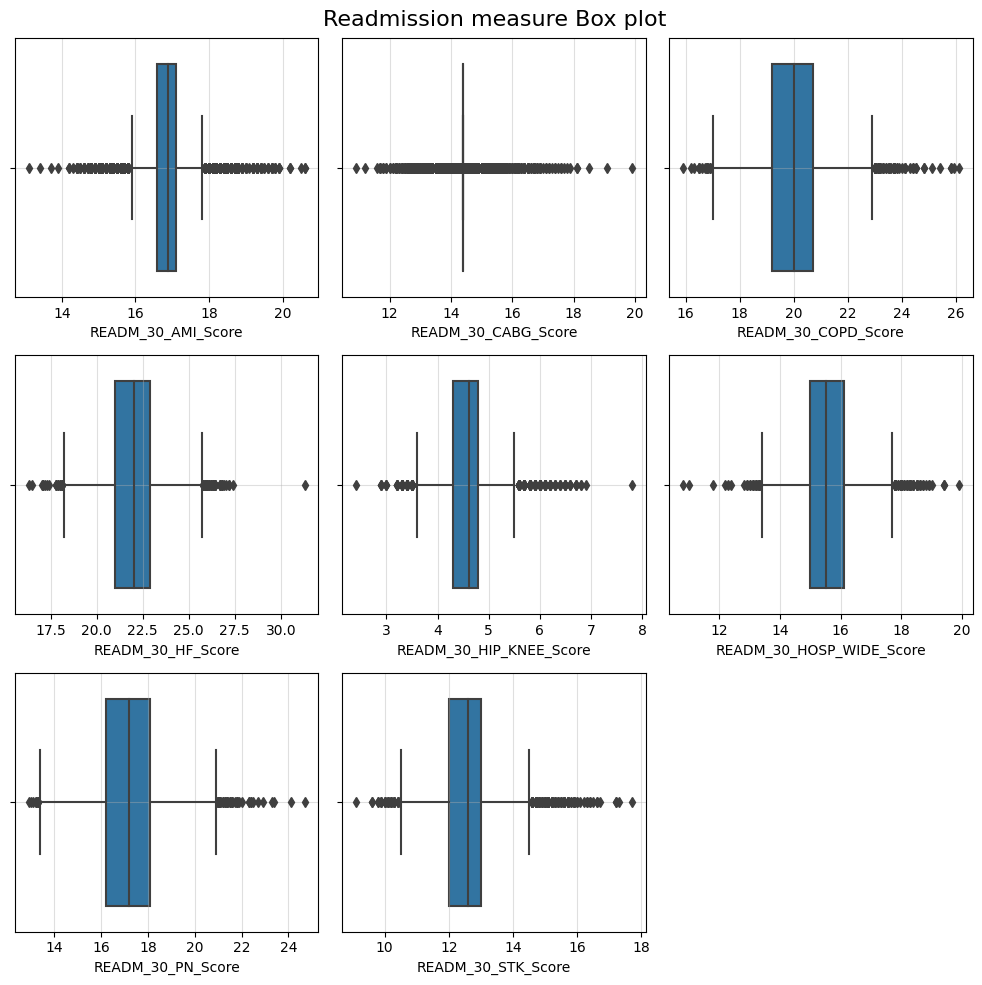

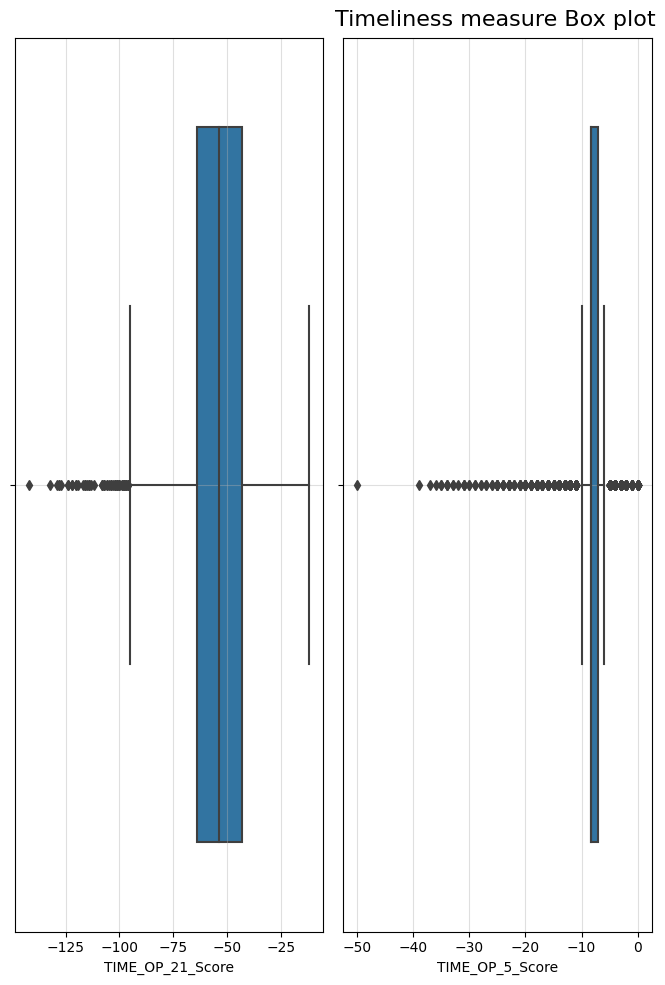

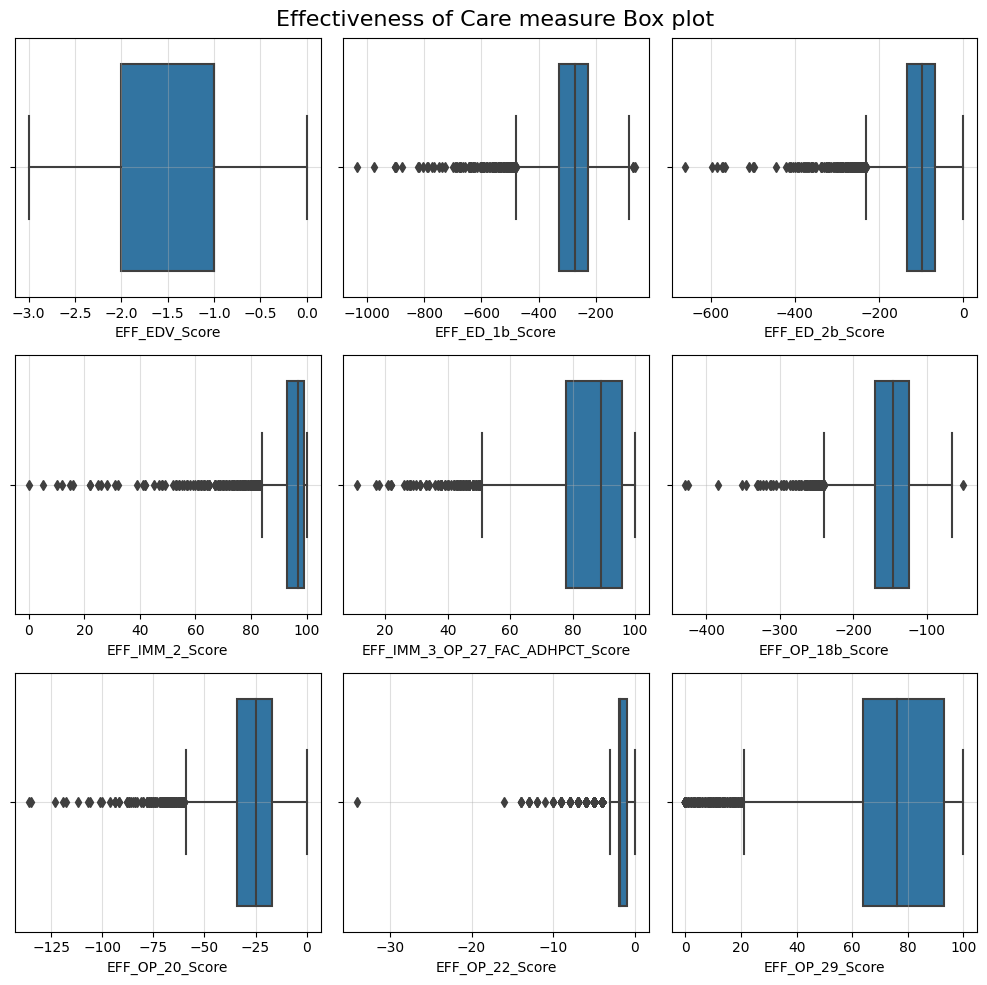

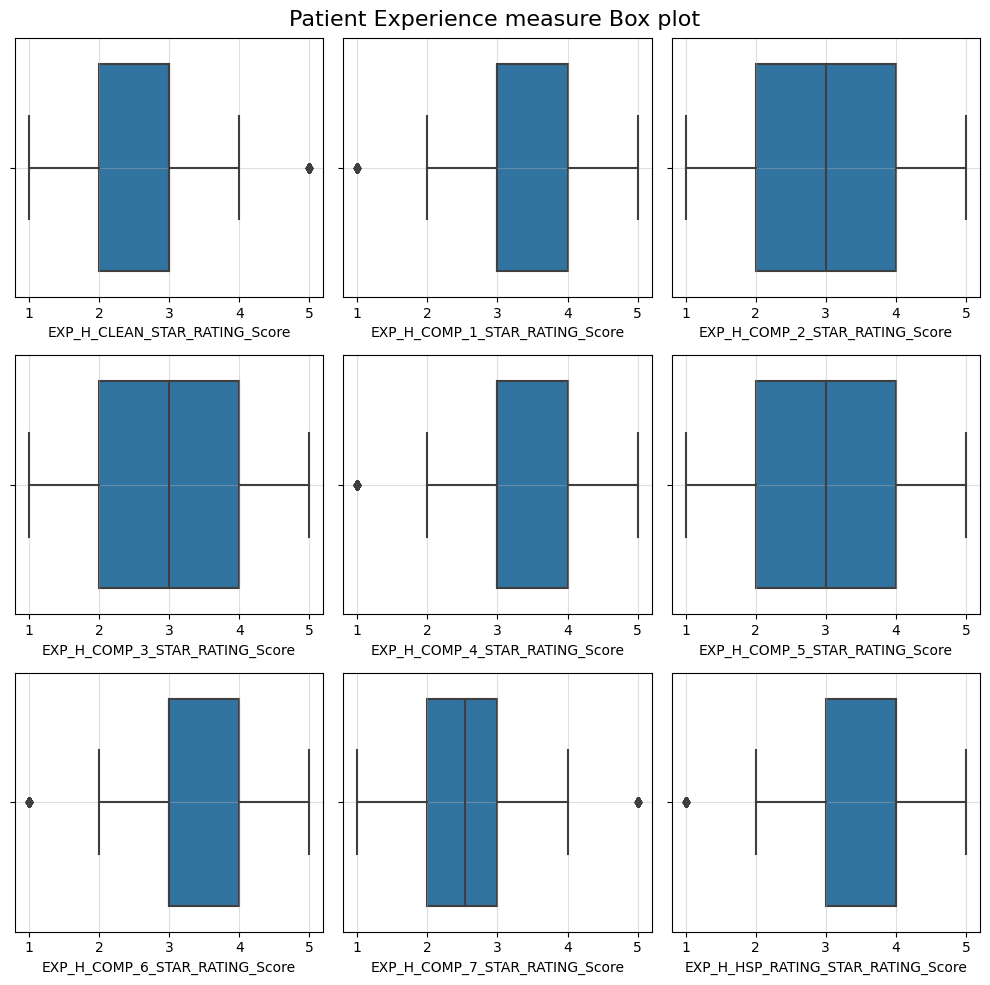

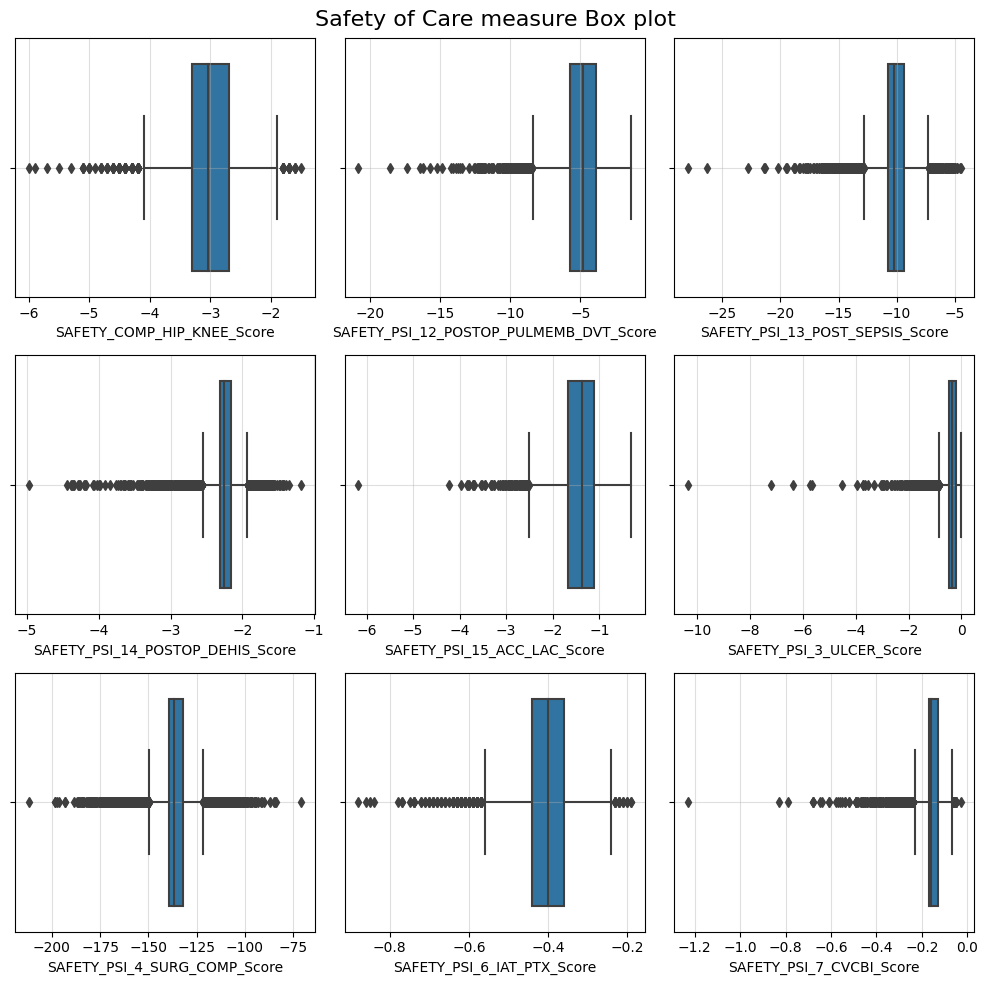

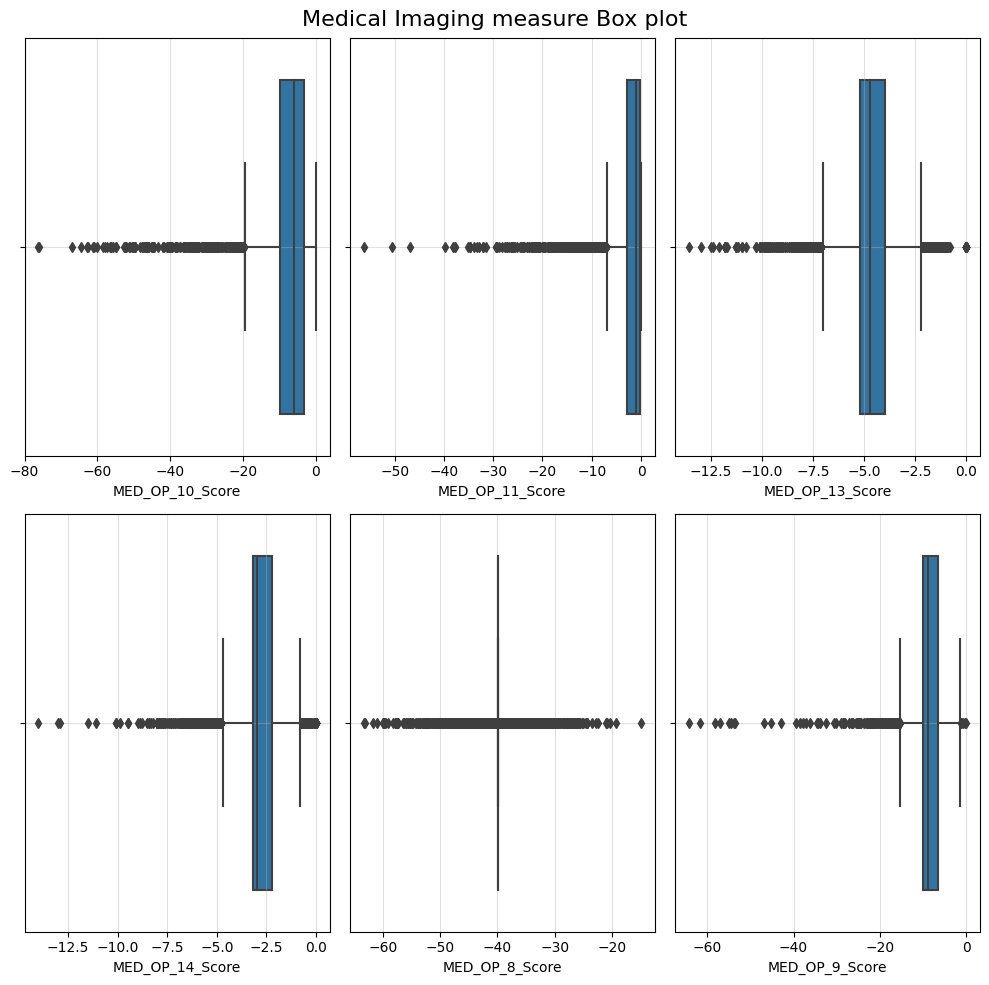

In [24]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.boxplot(x=df[col])
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure Box plot', fontsize=16)
    plt.show()

### Bivariate / Multivariate Analysis.

<hr style="border: 1px solid yellow; border-radius: 50%;">

### 1. Scatterplot

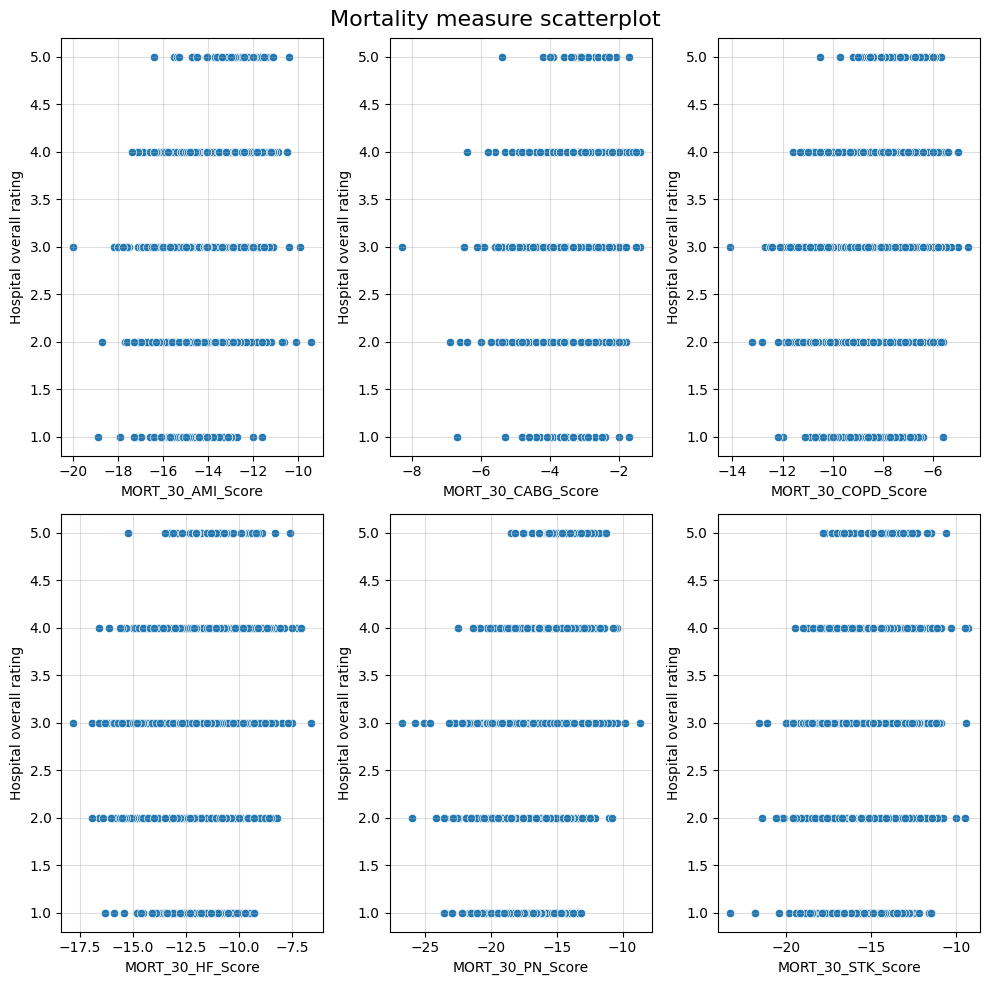

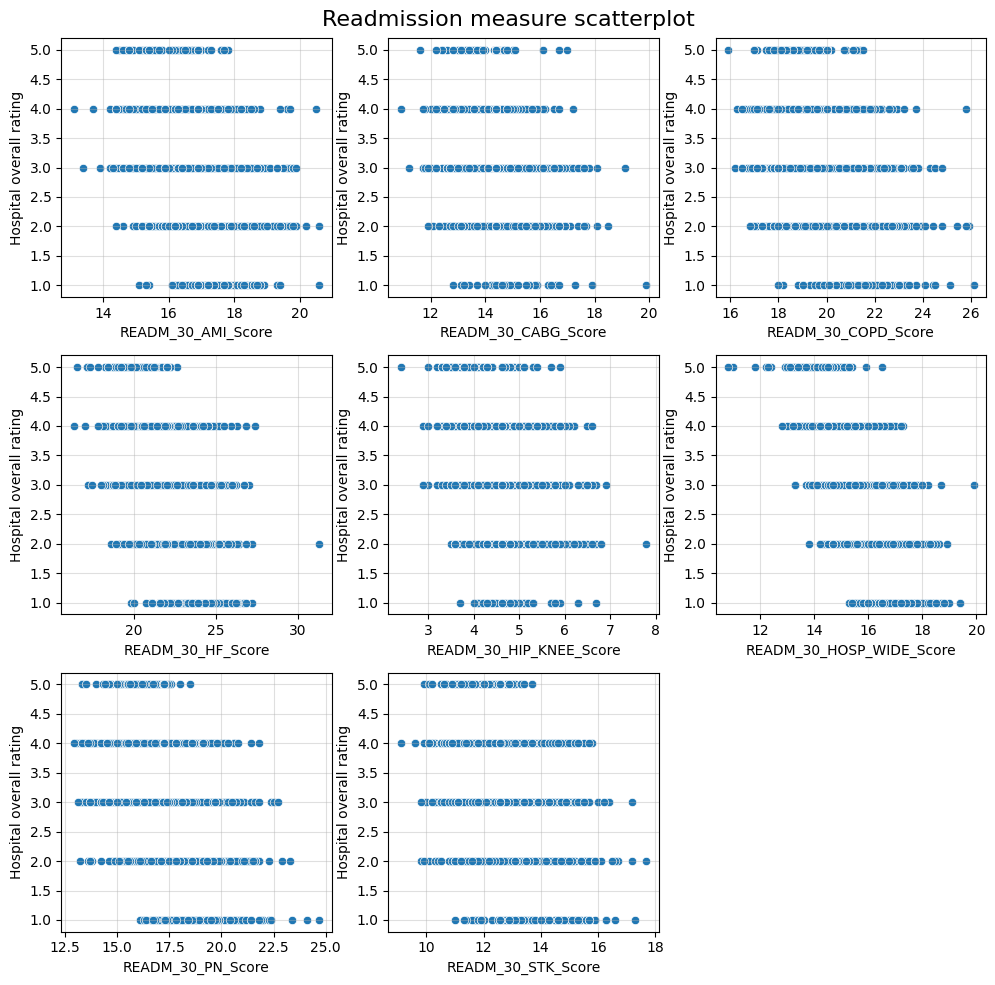

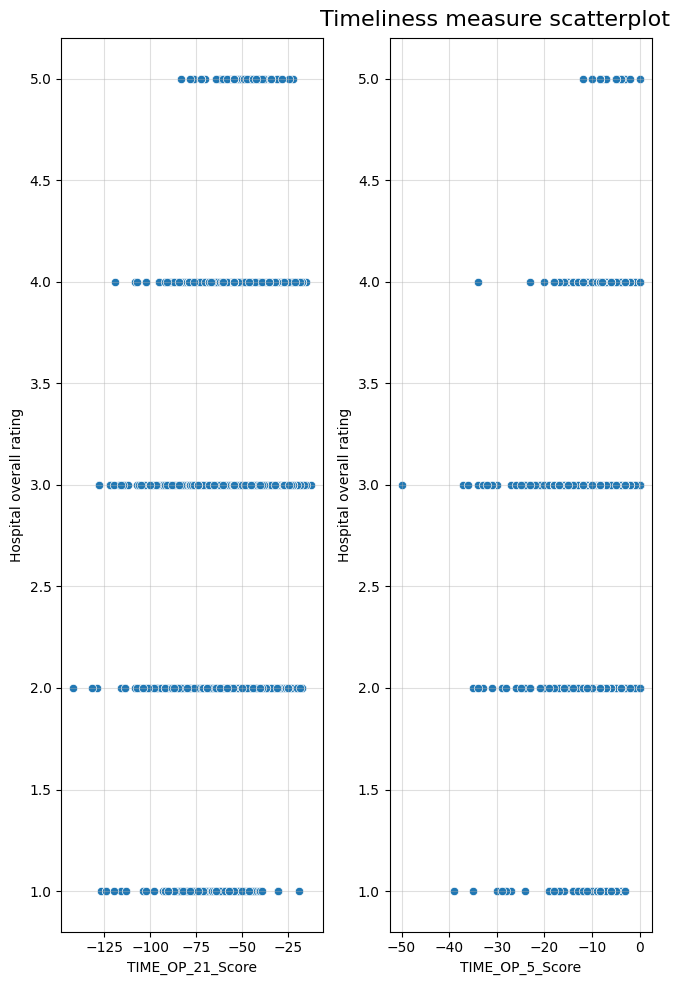

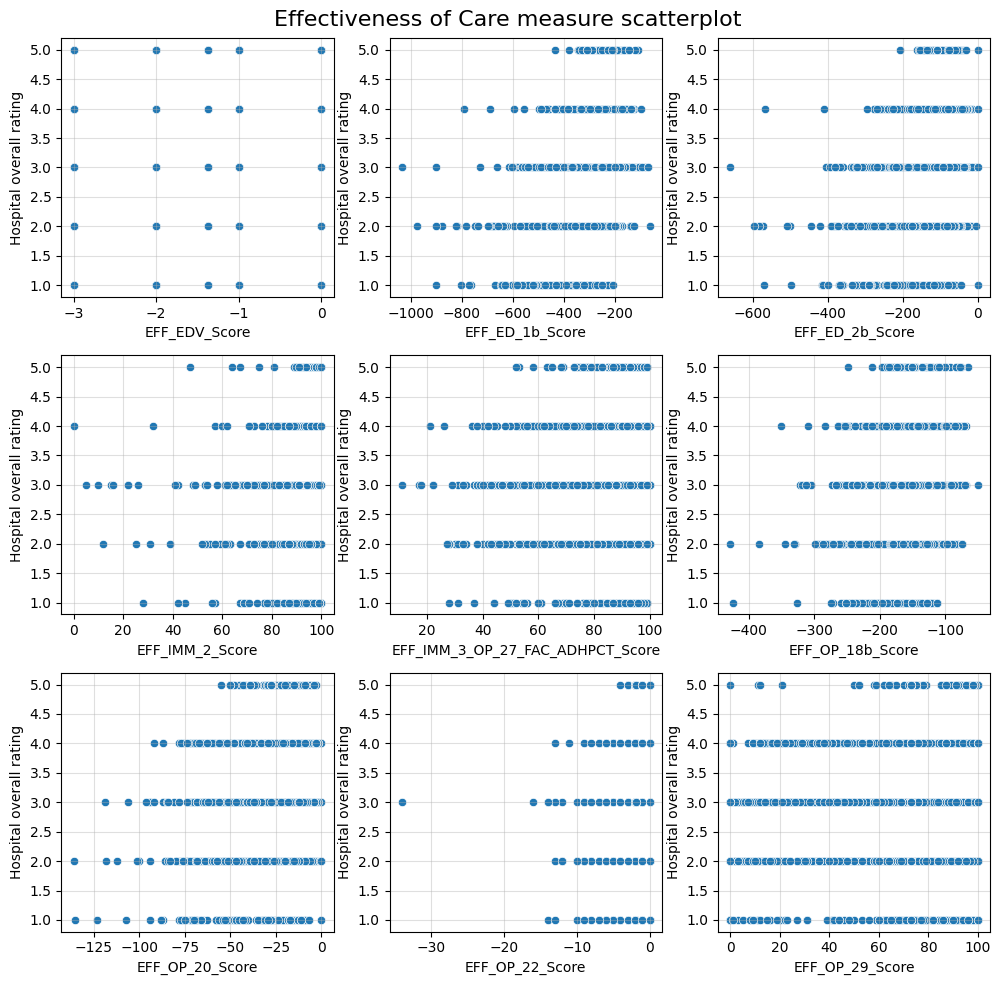

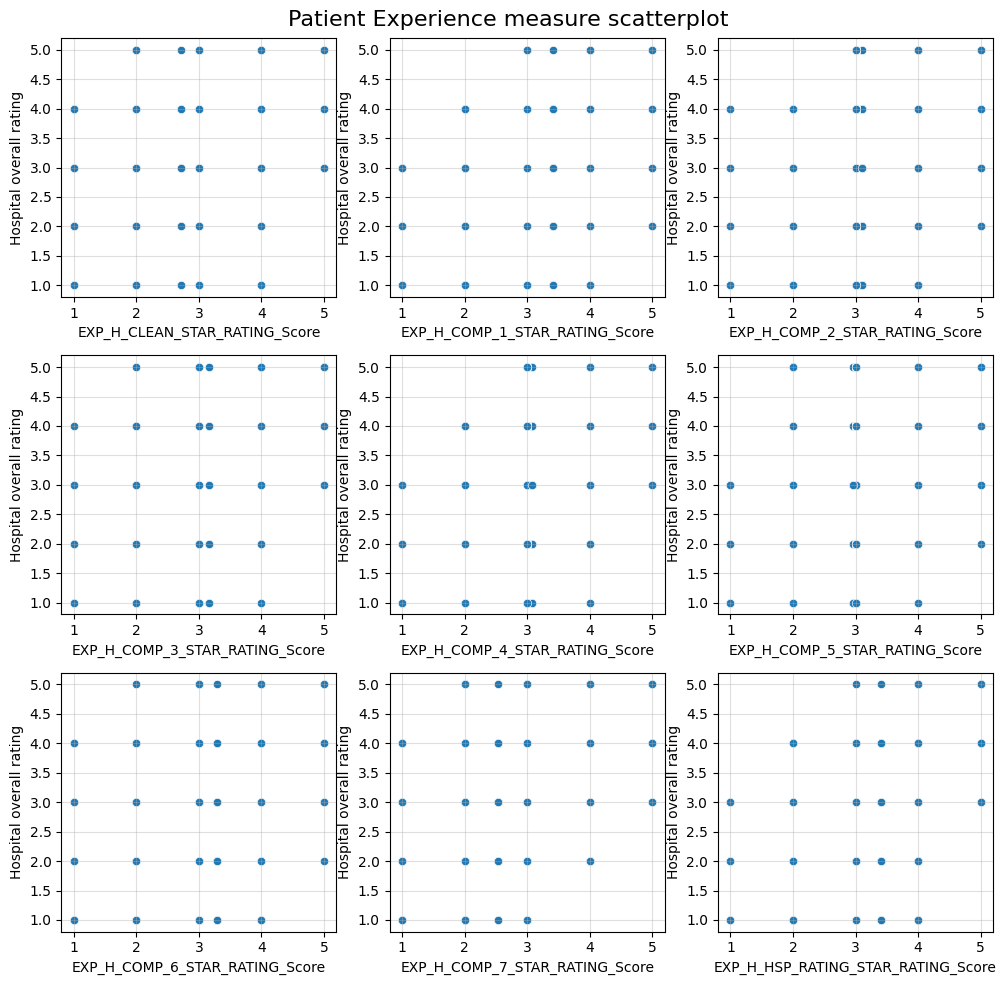

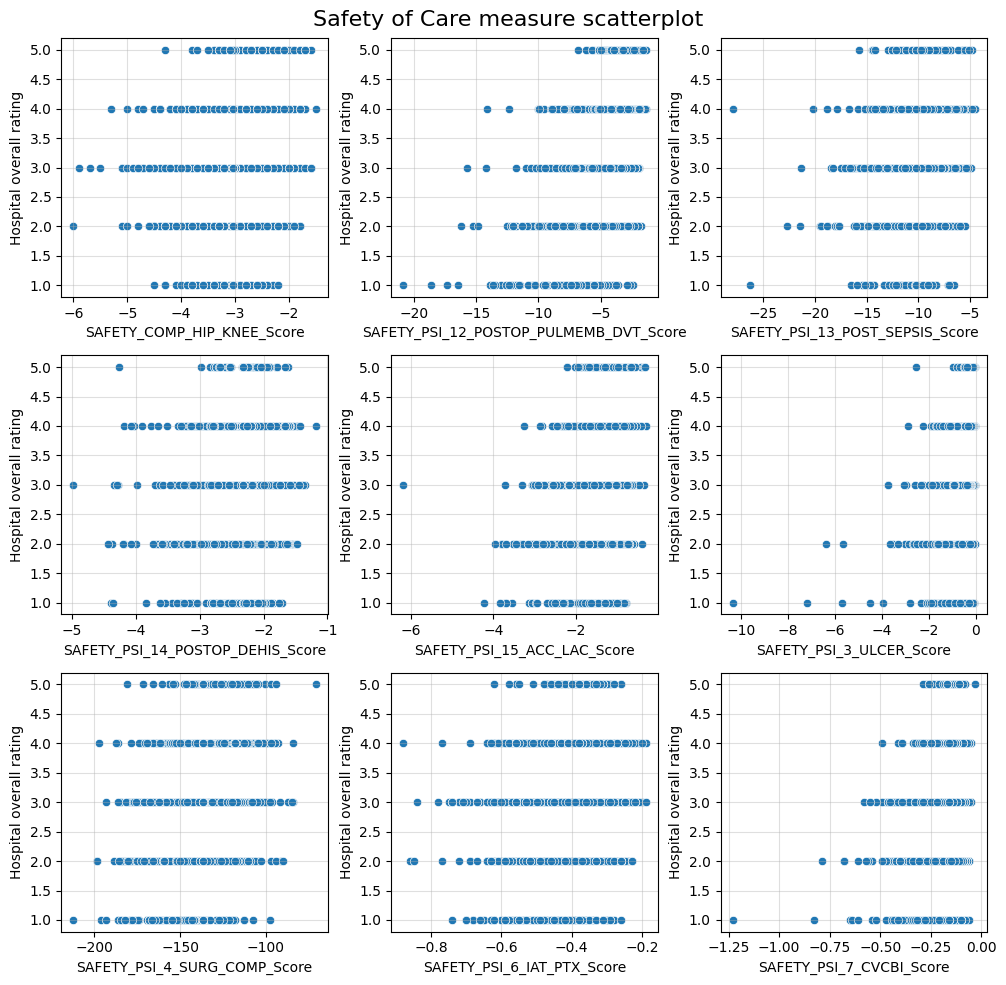

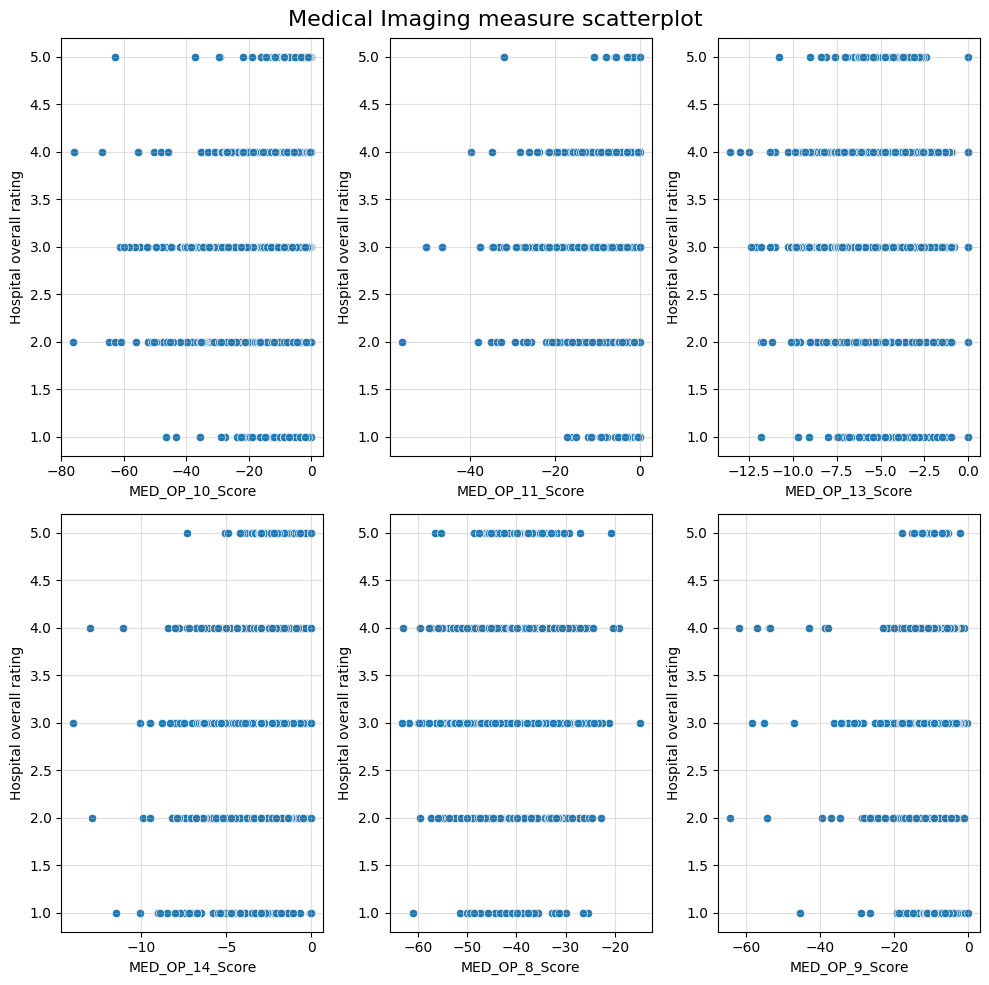

In [25]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.scatterplot(data=df, x=df[col], y='Hospital overall rating')
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure scatterplot', fontsize=16)
    plt.show()


plt.show()

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Lineplot Between Sub Measures and Hospital overall rating.

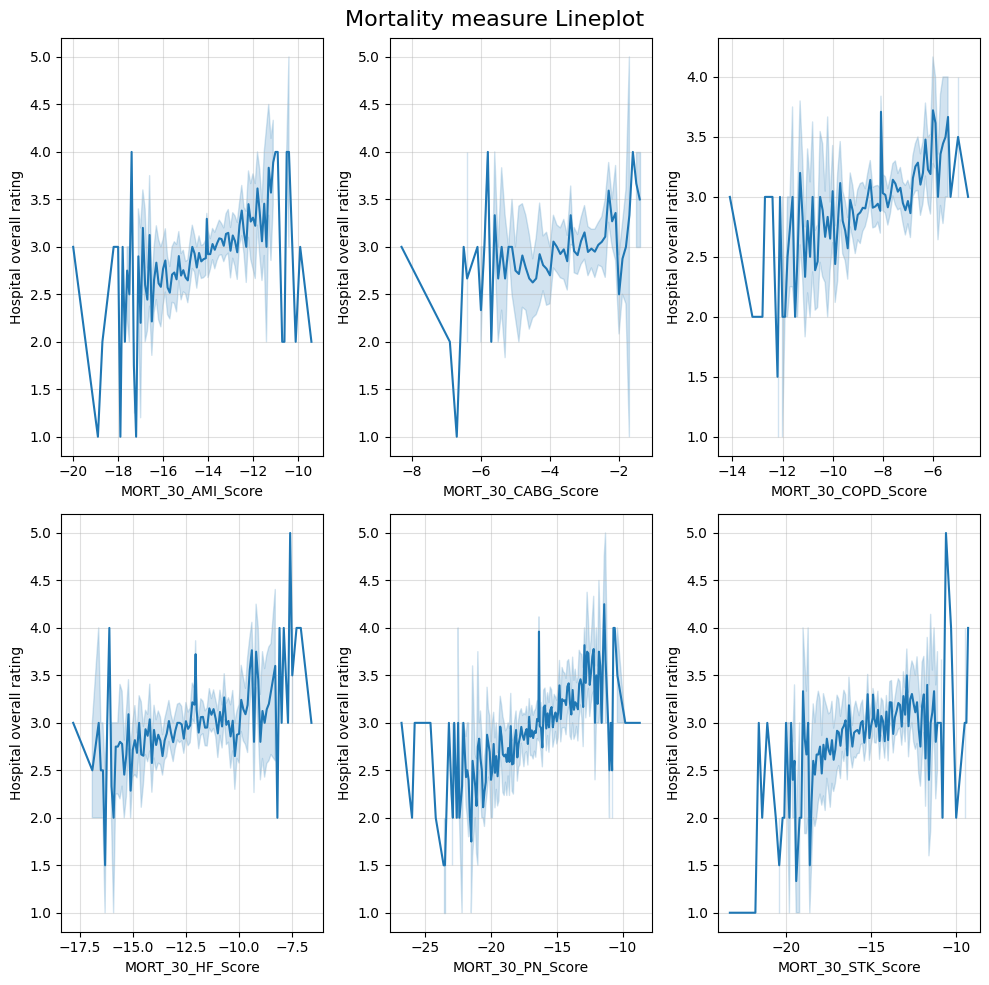

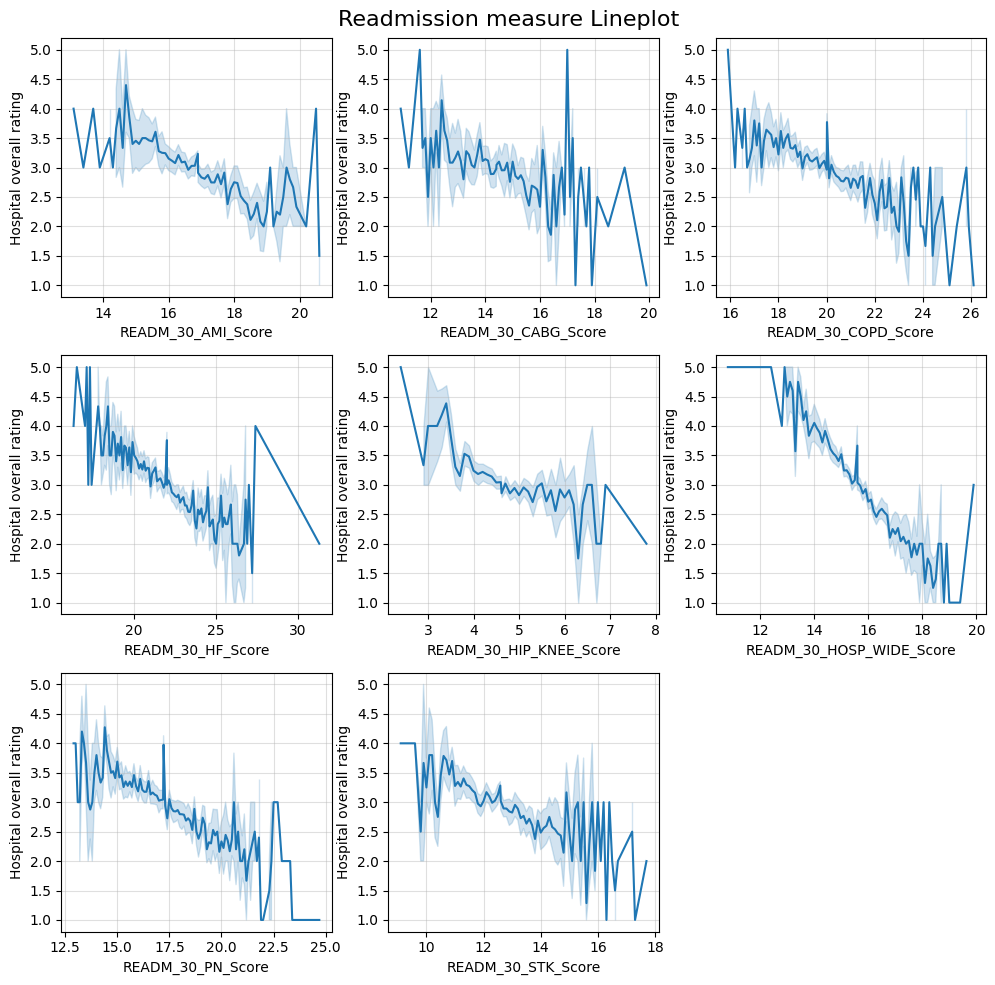

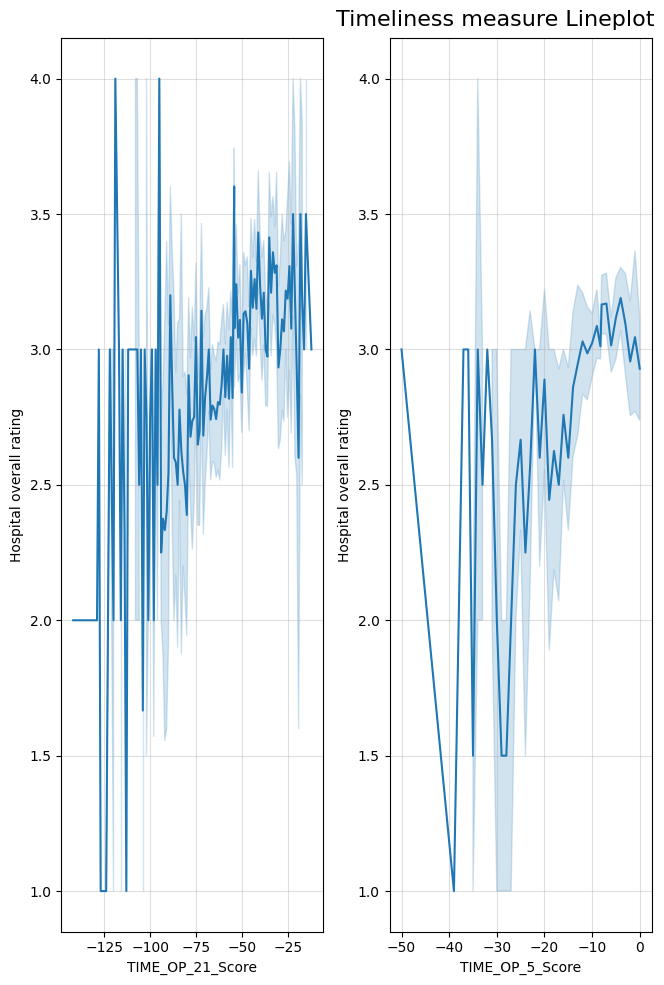

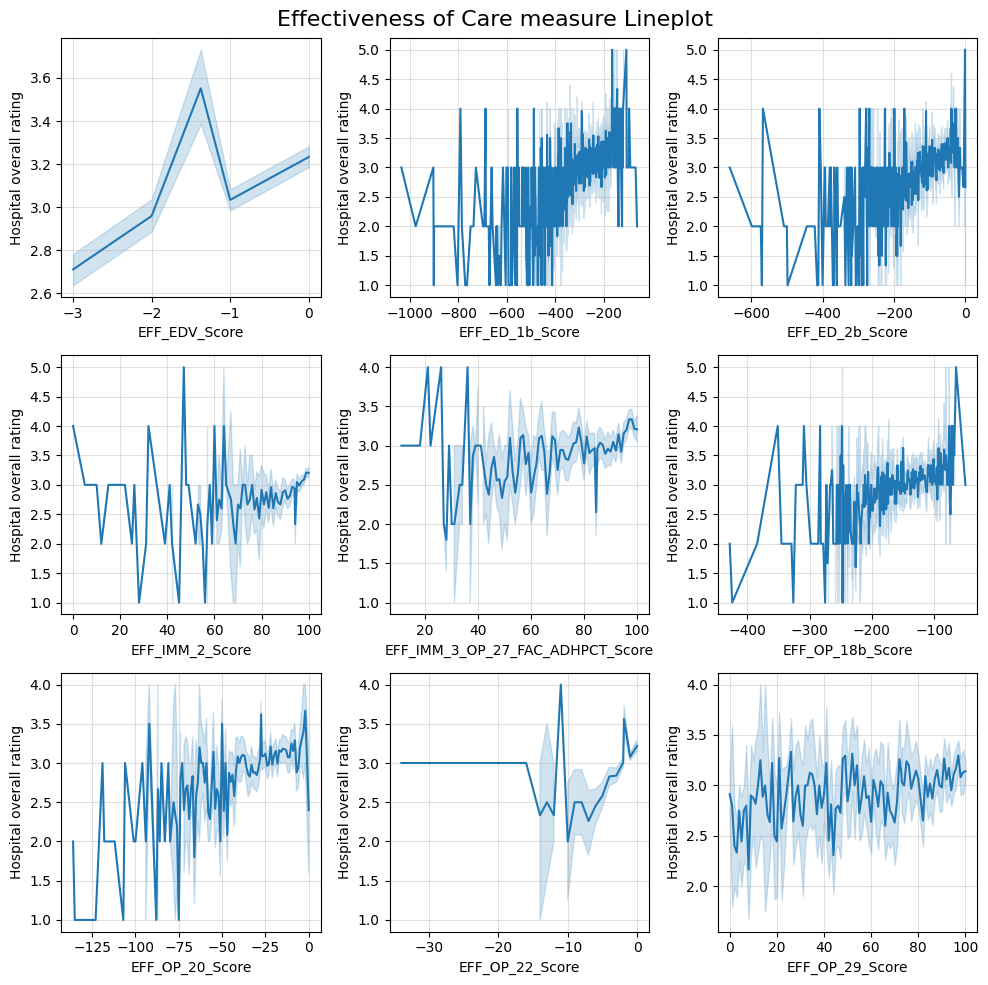

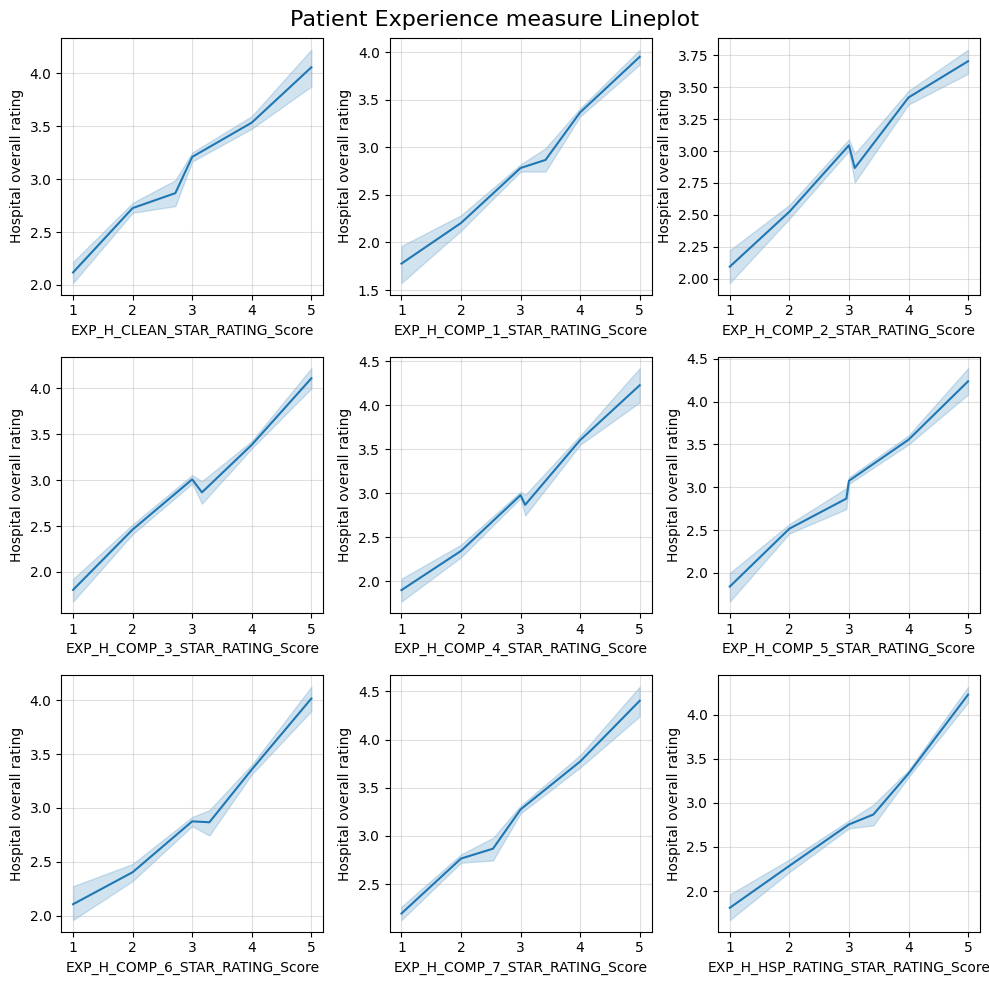

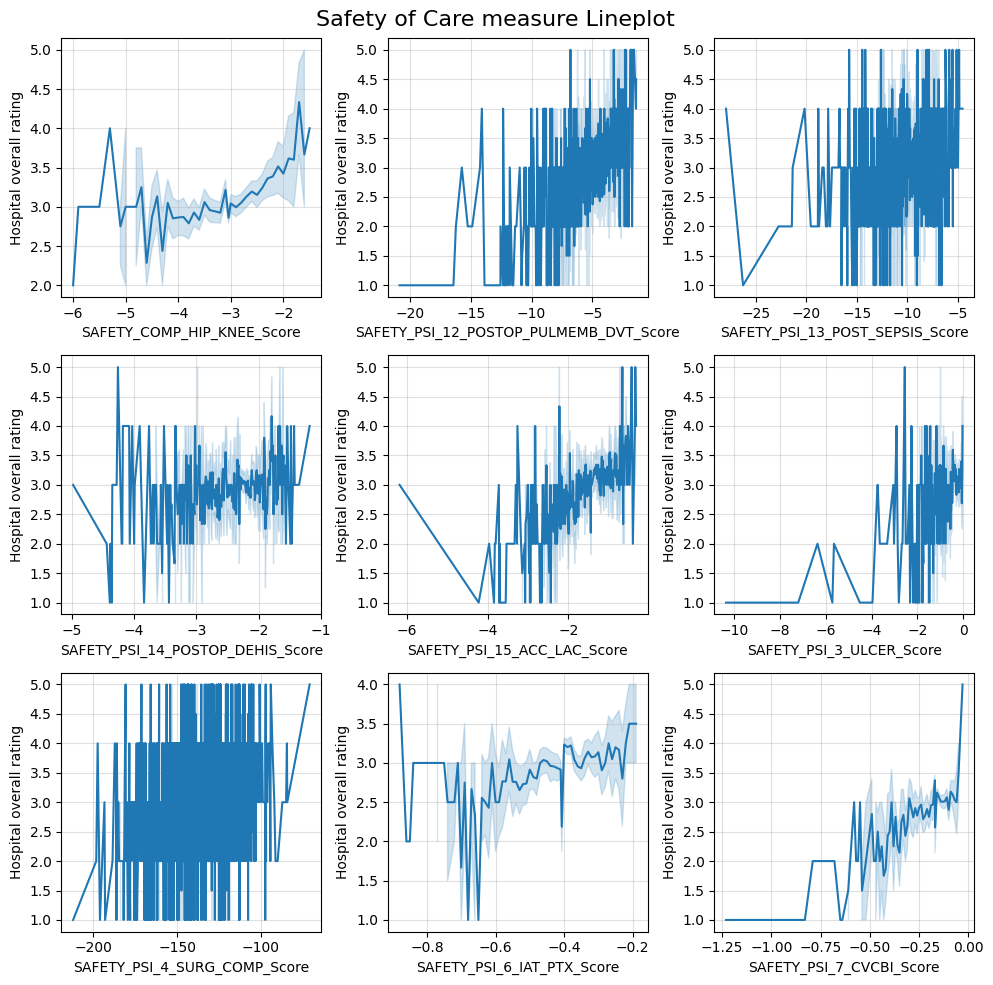

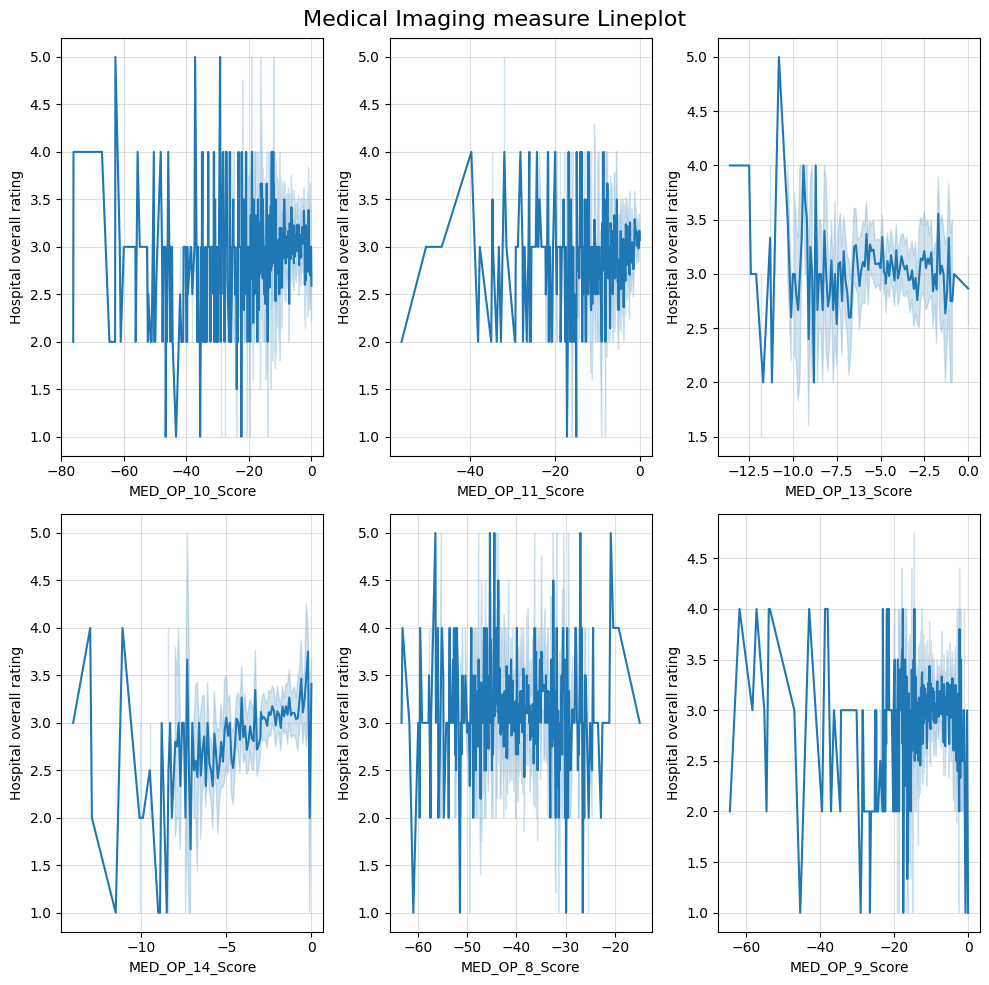

In [26]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

# Iterate over each measure and its columns
for measure, columns in measure_columns.items():
    num_cols = len(columns)
    num_plots = min(num_cols, rows * cols)
    num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

    # Create a new figure for the measure
    fig = plt.figure(figsize=(10, 10))

    # Iterate over each column of the measure
    for i, col in enumerate(columns[:num_plots]):
        # Create subplot
        plt.subplot(num_rows, cols, i + 1)
        
        # Plot histogram
        ax = sns.lineplot(data=df, y='Hospital overall rating', x=df[col])
        ax.grid(alpha=0.4)
        
        # Set title for each subplot
        fig.suptitle(col)
        
    # Adjust layout to prevent overlap of subplots
    plt.tight_layout()
    plt.suptitle(f'{measure} measure Lineplot', fontsize=16)
    plt.show()

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Lineplot Between Main Measures and Hospital overall rating.

In [27]:
main_features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

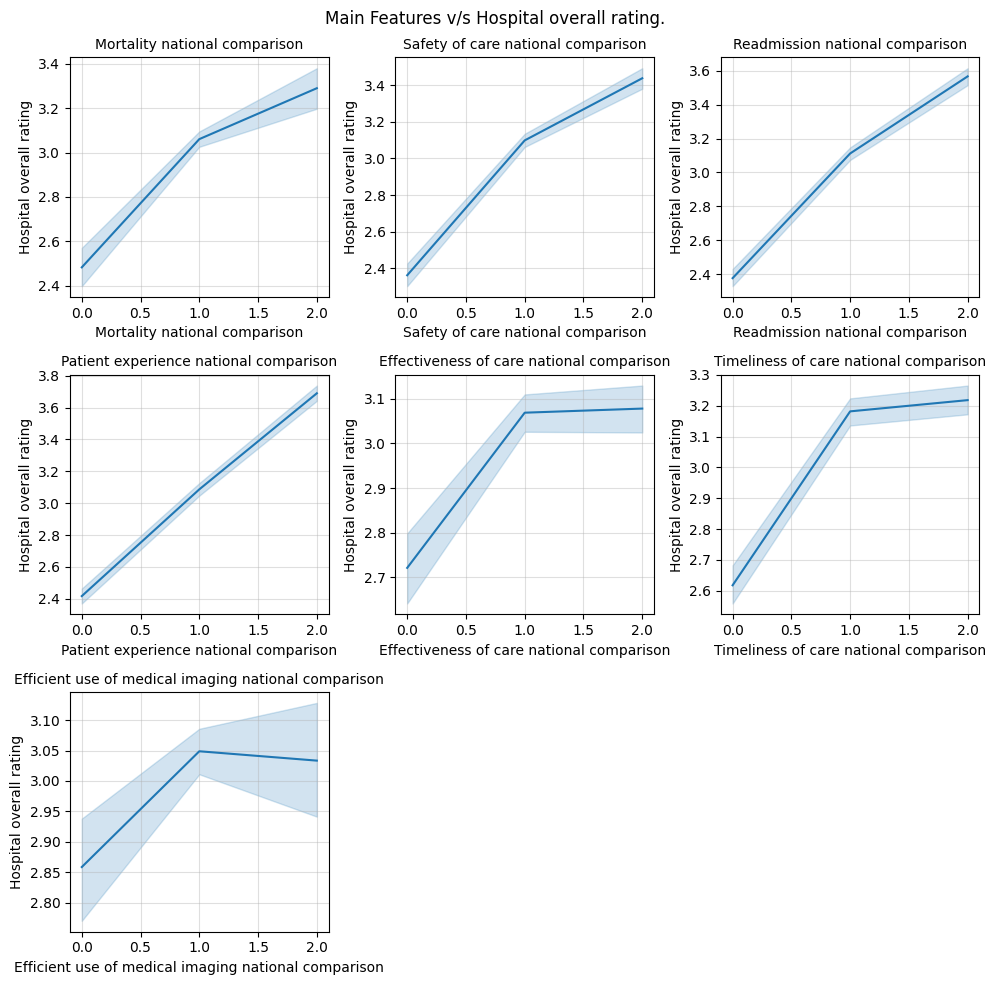

In [28]:
# Set the number of rows and columns for the subplots
rows = 3
cols = 3

num_cols = len(main_features)
num_plots = min(num_cols, rows * cols)
num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

# Create a new figure for the measure
fig = plt.figure(figsize=(10, 10))

# Iterate over each column of the measure
for i, col in enumerate(main_features[:num_plots]):
    # Create subplot
    plt.subplot(num_rows, cols, i + 1)
    
    # Plot histogram
    ax = sns.lineplot(data=df, y='Hospital overall rating', x=df[col])
    ax.set_title(col, fontsize=10)
    ax.grid(alpha=0.4)
    
# Set title for each subplot
fig.suptitle("Main Features v/s Hospital overall rating.")
    
# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

<hr style="border: 1px solid yellow; border-radius: 50%;">

### HeatMap betweem main measures.

In [29]:
main_features_corr = df.corr(numeric_only=True, method='spearman')['Hospital overall rating'][main_features].sort_values(ascending=False).to_frame()

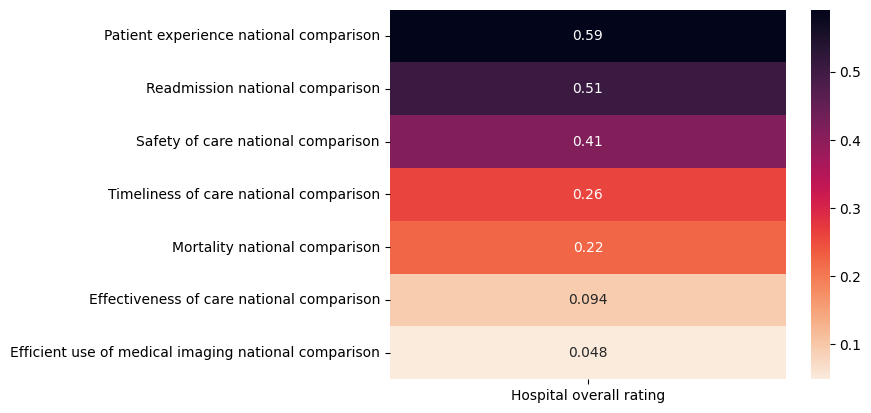

In [30]:
# Set the number of rows and columns for the subplots
# rows = 3
# cols = 3

# num_cols = len(main_features)
# num_plots = min(num_cols, rows * cols)
# num_rows = -(-num_plots // cols)  # Ceiling division to determine the number of rows needed

# # Create a new figure for the measure
# fig = plt.figure(figsize=(10, 10))

# # Iterate over each column of the measure
# for i, col in enumerate(main_features[:num_plots]):
#     # Create subplot
#     plt.subplot(num_rows, cols, i + 1)
    
#     # Plot histogram
ax = sns.heatmap(main_features_corr, cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True)
#     ax.set_title(f"{col}", fontsize=10)
    
# # Set title for each subplot
# fig.suptitle("Main Features correlation with Hospital overall rating.")
    
# # Adjust layout to prevent overlap of subplots
# plt.tight_layout()
# plt.show()

<hr style="border: 1px solid yellow; border-radius: 50%;">

### By Hospital Ownership and State of the hospital.

In [31]:
state_ownership_pivot_df = df.pivot_table(index="State", columns=["Hospital Ownership"], values=["Hospital overall rating"], aggfunc=["mean"])
state_df = state_ownership_pivot_df['mean']['Hospital overall rating'].reset_index(names="State")

#### Top 10 states by Hospital ownership.

In [32]:
top_state_gov = state_df.sort_values(by=["Government"], ascending=False)[:10][['State','Government']]
top_state_others = state_df.sort_values(by=["Others"], ascending=False)[:10][['State','Others']]
top_state_voluntary = state_df.sort_values(by=["Voluntary"], ascending=False)[:10][['State','Voluntary']]

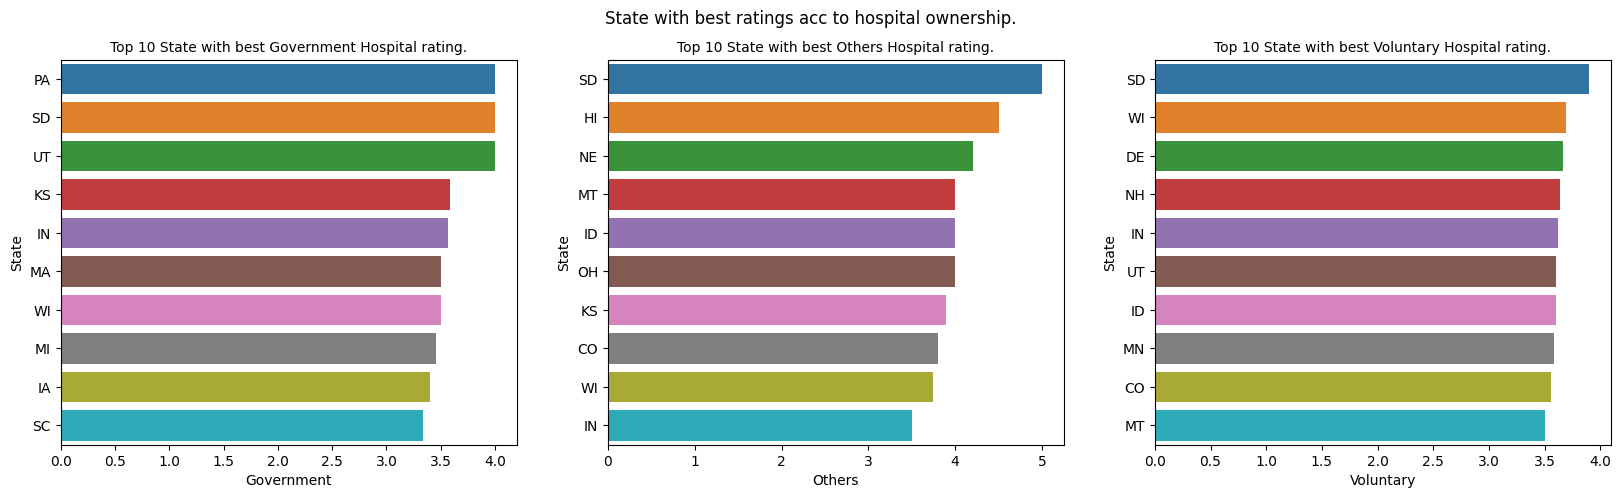

In [33]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle("State with best ratings acc to hospital ownership.")

gov = sns.barplot(data=top_state_gov, x="Government", y="State", ax=ax[0])
gov.set_title("Top 10 State with best Government Hospital rating.", fontsize=10)


others = sns.barplot(data=top_state_others, x="Others", y="State", ax=ax[1])
others.set_title("Top 10 State with best Others Hospital rating.", fontsize=10)


voluntary = sns.barplot(data=top_state_voluntary, x="Voluntary", y="State", ax=ax[2])
voluntary.set_title("Top 10 State with best Voluntary Hospital rating.", fontsize=10)

plt.show()

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Patient Experience at the hospital owned by different owners.

In [34]:
experience_ownership_pivot_df = df.pivot_table(index="Hospital Ownership",  values=['Patient experience national comparison'], aggfunc=["mean"])

In [35]:
experience_ownership_mean_df = experience_ownership_pivot_df['mean'].reset_index()

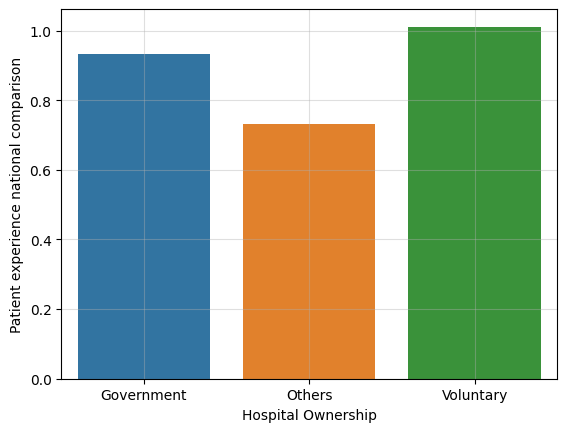

In [36]:
ax = sns.barplot(x=experience_ownership_mean_df['Hospital Ownership'], y=experience_ownership_mean_df['Patient experience national comparison'])
ax.grid(alpha=0.4)

<hr style="border: 2px solid red; border-radius: 50%;">

## Building the Machine Learning Models.

### Preparing the data for machine learning model.

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Dropping all the demographic features.

In [37]:
demographic_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

<hr style="border: 1px solid yellow; border-radius: 50%;">

In [38]:
df_model = df.copy()

<hr style="border: 1px solid yellow; border-radius: 50%;">

In [39]:
df_model = df_model.drop(columns=demographic_features)

<hr style="border: 1px solid yellow; border-radius: 50%;">

In [40]:
## Empty means all the features are dropped.
[col for col in demographic_features if col in df_model.columns.to_list()]

[]

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Dropping the unnecessary columns.

In [41]:
df_model.columns

Index(['Hospital Ownership', 'Emergency Services', 'Hospital overall rating',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score',
       'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score',
       'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score',
       'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 'EFF_IMM_2_Score',
       'EFF_IMM_3_OP_27_FAC_ADHPCT_Score', 'EFF_OP_18b_Score',
       'EFF_OP_20_Score', 'EFF_OP_2

<Axes: >

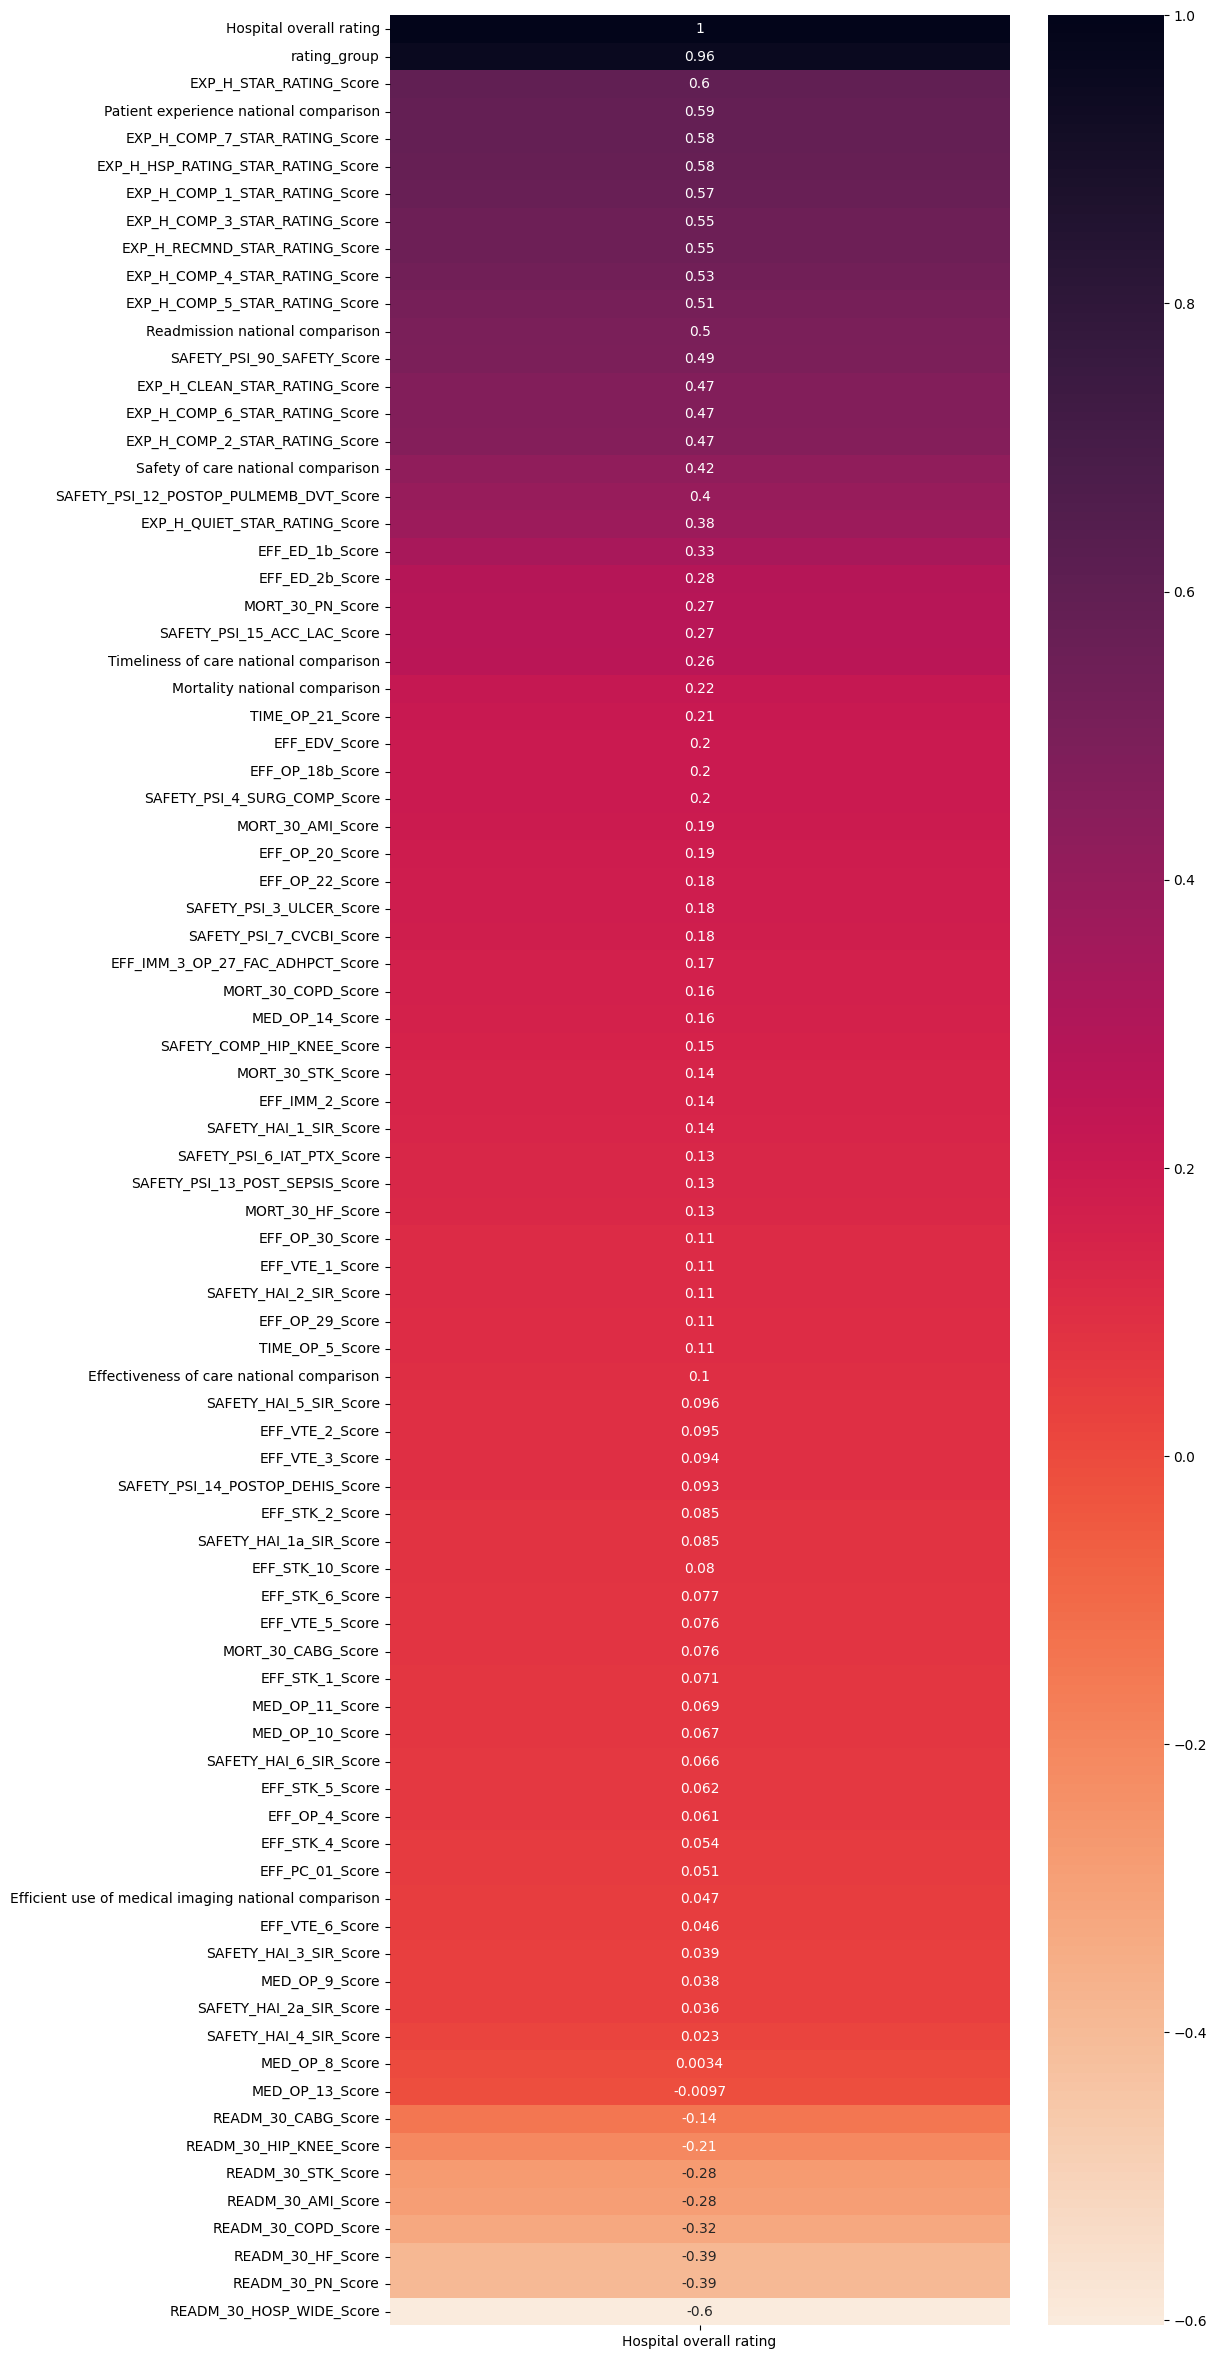

In [42]:
fig, ax = plt.subplots(figsize=(10, 30))
sns.heatmap(df_model.corr(numeric_only=True)['Hospital overall rating'].sort_values(ascending=False).to_frame(), cmap=sns.color_palette("rocket_r", as_cmap=True), annot=True, ax=ax)

<hr style="border: 1px solid yellow; border-radius: 50%;">

In [43]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr(numeric_only=True)
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [44]:
corr_features = correlation(df_model, 0.8)

In [45]:
df_model = df_model.drop(corr_features, axis=1)

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Mapping the Ratings.

- 1, 2, and 3 will be 0.
- 4, and 5 will be 1.

In [230]:
map_ratings = lambda x: 0 if x == 1 or x == 2 or x == 3 else 1

In [231]:
for i in [1, 2, 1, 3, 2, 5, 4]:
    print(map_ratings(i))

0
0
0
0
0
1
1


In [232]:
df_model['hospital_overall_rating'] = df_model['Hospital overall rating'].apply(lambda x: map_ratings(x))

In [233]:
display_dataframe_as_html(df_model[['hospital_overall_rating', 'Hospital overall rating']])

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Converting datatypes to categorical variables.

In [50]:
nominal_categorical_features = [
    'Hospital Ownership', 'Emergency Services'
]

In [51]:
ordinal_categorical_features = [
    'Mortality national comparison', 'Safety of care national comparison',
    'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison',
    'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison'
]

<hr style="border: 1px solid yellow; border-radius: 50%;">

In [52]:
df_model[nominal_categorical_features] = df_model[nominal_categorical_features].astype('category')

In [53]:
ratings_category = [2, 1, 0]

In [54]:
ratings_category_order = pd.CategoricalDtype(ratings_category, ordered=True)

<hr style="border: 1px solid yellow; border-radius: 50%;">

In [55]:
df_model[ordinal_categorical_features] = df_model[ordinal_categorical_features].astype(ratings_category_order)

In [56]:
display_series_as_html(df_model.dtypes)

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Splitting the Data

In [57]:
X = df_model.drop(columns=['Hospital overall rating', 'hospital_overall_rating'])
y = df_model['hospital_overall_rating']

In [58]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

In [59]:
X_train.head()

Hospital Ownership Emergency Services Mortality national comparison  \
2001          Voluntary                Yes                             1   
2336          Voluntary                Yes                             1   
1242          Voluntary                Yes                             1   
1491          Voluntary                Yes                             1   
1651          Voluntary                Yes                             1   

     Safety of care national comparison Readmission national comparison  \
2001                                  2                               2   
2336                                  0                               0   
1242                                  1                               1   
1491                                  1                               1   
1651                                  1                               1   

     Patient experience national comparison  \
2001                                      1   
2336                                      1   
1242                                      0   
1491                                      1   
1651                                      2   

     Effectiveness of care national comparison  \
2001                                         1   
2336                                         2   
1242                                         1   
1491                                         1   
1651                                         1   

     Timeliness of care national comparison  \
2001                                      2   
2336                                      0   
1242                                      1   
1491                                      2   
1651                                      1   

     Efficient use of medical imaging national comparison  MORT_30_AMI_Score  \
2001                                                  1           -14.500000   
2336                                                  1           -13.100000   
1242                                                  1           -14.400000   
1491                                                  1           -14.054091   
1651                                                  1           -15.900000   

      ...  SAFETY_HAI_3_SIR_Score  SAFETY_HAI_4_SIR_Score  \
2001  ...                -0.96398               -0.871177   
2336  ...                -0.73900               -0.000000   
1242  ...                -0.98400               -0.871177   
1491  ...                -0.96398               -1.528000   
1651  ...                -1.28600               -0.871177   

      SAFETY_HAI_5_SIR_Score  SAFETY_HAI_6_SIR_Score  MED_OP_10_Score  \
2001               -0.987212                  -0.000            -13.0   
2336               -0.497000                  -0.625             -9.5   
1242               -2.126000                  -1.632            -13.3   
1491               -0.987212                  -0.865             -6.8   
1651               -0.987212                  -1.188             -2.6   

      MED_OP_11_Score  MED_OP_13_Score  MED_OP_14_Score  MED_OP_8_Score  \
2001             -4.1        -4.716942        -2.964405      -39.964766   
2336             -0.0        -4.500000        -1.300000      -25.000000   
1242             -0.0        -3.500000        -1.300000      -39.964766   
1491            -11.8        -4.716942        -2.964405      -39.964766   
1651             -0.0        -4.300000        -1.800000      -35.400000   

      MED_OP_9_Score  
2001       -4.400000  
2336       -7.800000  
1242       -8.400000  
1491       -2.300000  
1651       -9.144957  

[5 rows x 79 columns]

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Encoding and Scaling the data.

#### Getting the nominal Features

In [60]:
nominal_categorical_features_idx = [X_train.columns.get_loc(x) for x in nominal_categorical_features]

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Getting the ordinal features

In [61]:
ordinal_categorical_features_idx = [X_train.columns.get_loc(x) for x in ordinal_categorical_features]

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Getting the numerical features

In [62]:
numerical_features_idx = [X_train.columns.get_loc(x) for x in X_train.select_dtypes('float64').columns]

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Ordinal Encoder  Column Transformer.

In [63]:
ordinal_transformer = ColumnTransformer(transformers=[
    ('ord_en', OrdinalEncoder(), nominal_categorical_features_idx),
], remainder='passthrough')

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### One Hot Encoder Column Transformer.

In [64]:
ohe_transformer = ColumnTransformer(transformers=[
    ('ohe_en', OneHotEncoder(drop='first', sparse_output=False), ordinal_categorical_features_idx),
], remainder='passthrough')

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Standard Scaler Column Transformer

In [65]:
scaler_transformer = ColumnTransformer(transformers=[
    ('scaler', StandardScaler(), slice(0, 80))
], remainder='passthrough')

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Pipeline for column formers

In [66]:
data_transformer_pipeline = Pipeline([
     ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('std_scale_trf', scaler_transformer),
])

<hr style="border: 2px solid red; border-radius: 50%;">

### Creating the Logistic Regression Pipeline

In [67]:
log_reg = LogisticRegression(penalty=None, solver='lbfgs', random_state=0, 
                                     max_iter=10000)

In [68]:
logistic_regression_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('std_scale_trf', scaler_transformer),
    ('log_reg', log_reg)
])

In [69]:
logistic_regression_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('std_scale_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 80, None))])),
                ('log_reg',
                 LogisticRegression(max_iter=10000, penalty=None,
                                    random_state=0))])

In [70]:
log_train_acc = logistic_regression_pipeline.score(X_train, y_train)
log_val_acc = logistic_regression_pipeline.score(X_val, y_val)

In [71]:
(log_train_acc, log_val_acc)

(0.9565217391304348, 0.9357298474945533)

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Tuning the Logistic Regression

In [72]:
param_grid = {
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [73]:
best_log_reg = LogisticRegression()

In [74]:
grid_cv_for_logreg = GridSearchCV(
    estimator=best_log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

In [75]:
logreg_grid_search_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('std_scale_trf', scaler_transformer),
    ('grid_search', grid_cv_for_logreg)
])

In [78]:
logreg_grid_search_pipeline.fit(X_train, y_train)

C:\Users\DELL 5590\codes\upgrad_maryland_analytics\venv\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
70 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\DELL 5590\codes\upgrad_maryland_analytics\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL 5590\codes\upgrad_maryland_analytics\venv\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\DELL 559

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('std_scale_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 80, None))])),
                ('grid_search',
                 GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
                              param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                          'penalty': ['l1', 'l2'],
                                          'solver': ['newton-cg', 'lbfgs',
                                                     'liblinear']},
                              scoring='accuracy'))])

In [80]:
best_params_logreg = logreg_grid_search_pipeline['grid_search'].best_params_

In [81]:
best_params_logreg

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [82]:
logreg_grid_search_pipeline['grid_search'].best_score_

0.9317560025389042

In [83]:
best_log_reg = LogisticRegression(**best_params_logreg)

In [84]:
tuned_log_reg_pipeline = Pipeline(steps=[
     ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('std_scale_trf', scaler_transformer),
    ('log_reg', best_log_reg)
])

In [85]:
tuned_log_reg_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('std_scale_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 80, None))])),
                ('log_reg', LogisticRegression(solver='newton-cg'))])

In [86]:
tuned_log_reg_train_acc = tuned_log_reg_pipeline.score(X_train, y_train)
tuned_log_reg_val_acc = tuned_log_reg_pipeline.score(X_val, y_val)

In [87]:
(tuned_log_reg_train_acc, tuned_log_reg_val_acc)

(0.9593267882187938, 0.9357298474945533)

<hr style="border: 1px solid red; border-radius: 50%;">

### Creating DecisionTreeClassifier Pipeline

In [88]:
decision_tree_clf = DecisionTreeClassifier(random_state=13)

In [89]:
decision_tree_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('tree_clf', decision_tree_clf)
])

In [90]:
decision_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('tree_clf', DecisionTreeClassifier(random_state=13))])

In [91]:
tree_clf_train_acc = decision_tree_pipeline.score(X_train, y_train)
tree_clf_val_acc = decision_tree_pipeline.score(X_val, y_val)

In [92]:
(tree_clf_train_acc, tree_clf_val_acc)

(1.0, 0.8257080610021786)

Large gap between the training accuracy score and validation accuracy score signifies that Model is overfitting the data.\
We can mitigate the overfitting of data by pruning the decision tree.

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Pruning The decision Tree

In [111]:
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

In [142]:
clf = DecisionTreeClassifier()

In [181]:
grid_cv_for_clf = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

In [182]:
grid_search_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('grid_search', grid_cv_for_clf)
])

In [183]:
grid_search_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('grid_search',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              n_jobs=-1,
                              param_grid={'max_depth': [3, 5, 10, 15, 20, None],
                                          'min_samples_leaf': [1, 2, 5],
                                          'min_samples_split': [2, 5, 7, 10]},
                              scoring='accuracy'))])

In [184]:
best_params_clf = grid_search_pipeline['grid_search'].best_params_

In [185]:
best_params_clf

{'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}

In [186]:
grid_search_pipeline['grid_search'].best_score_

0.8265589091466217

In [187]:
pruned_decision_tree = DecisionTreeClassifier(max_depth=best_params_clf['max_depth'], min_samples_leaf=best_params_clf['min_samples_leaf'], min_samples_split=best_params_clf['min_samples_split'])

In [188]:
pruned_tree_clf_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('tree_clf', pruned_decision_tree)
])

In [189]:
pruned_tree_clf_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('tree_clf',
                 DecisionTreeClassifier(max_depth=5, min_samples_leaf=5,
                                        min_samples_split=10))])

In [190]:
pruned_tree_clf_train_acc = pruned_tree_clf_pipeline.score(X_train, y_train)
pruned_tree_clf_val_acc = pruned_tree_clf_pipeline.score(X_val, y_val)

In [191]:
(pruned_tree_clf_train_acc, pruned_tree_clf_val_acc)

(0.8868630201028518, 0.840958605664488)

the pruned decision tree model demonstrates reasonable performance on both the test and validation datasets, indicating that the pruning process has helped mitigate overfitting and improve the model's generalization ability

<hr style="border: 1px solid red; border-radius: 50%;">

## K-Nearest Neighbours Model

In [192]:
knn = KNeighborsClassifier(n_neighbors=3)

In [193]:
knn_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('std_scale_trf', scaler_transformer),
    ('knn_clf', knn)
])

In [194]:
knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('std_scale_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 80, None))])),
                ('knn_clf', KNeighborsClassifier(n_neighbors=3))])

In [195]:
knn_clf_train_acc = knn_pipeline.score(X_train, y_train)
knn_clf_val_acc = knn_pipeline.score(X_val, y_val)

In [196]:
(knn_clf_train_acc, knn_clf_val_acc)

(0.8938756428237494, 0.7864923747276689)

There is overfitting in the model as the difference is large.

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Optimizing the model with GridSearchCV

In [197]:
parameters_KNN = {
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}

In [198]:
knn_clf = KNeighborsClassifier(algorithm='auto')

In [199]:
grid_cv_for_knn = GridSearchCV(
    estimator=knn_clf,
    param_grid=parameters_KNN,
    scoring='accuracy',
    n_jobs=-1,
    cv=5
)

In [200]:
grid_search_knn_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('grid_search_knn', grid_cv_for_knn)
])

In [201]:
grid_search_knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('grid_search_knn',
                 GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
                              param_grid={'leaf_size': (20, 40, 1),
                                          'metric': ('minkowski', 'chebyshev'),
                                          'n_neighbors': (1, 10, 1),
                                          'p': (1, 2),
                                          'weights': ('uniform', 'distance')},
                              scoring='accuracy'))])

In [202]:
best_params_knn = grid_search_knn_pipeline['grid_search_knn'].best_params_

In [203]:
best_params_knn

{'leaf_size': 20,
 'metric': 'minkowski',
 'n_neighbors': 10,
 'p': 1,
 'weights': 'uniform'}

In [205]:
best_knn_clf = KNeighborsClassifier(algorithm='auto', **best_params_knn)

In [206]:
best_knn_pipeline = Pipeline(steps=[
    ('ord_trf', ordinal_transformer),
    ('nom_trf', ohe_transformer),
    ('std_scale_trf', scaler_transformer),
    ('knn_clf', best_knn_clf)
])

In [207]:
best_knn_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ord_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord_en', OrdinalEncoder(),
                                                  [0, 1])])),
                ('nom_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_en',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [2, 3, 4, 5, 6, 7, 8])])),
                ('std_scale_trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  slice(0, 80, None))])),
                ('knn_clf',
                 KNeighborsClassifier(leaf_size=20, n_neighbors=10, p=1))])

In [208]:
best_knn_clf_train_acc = best_knn_pipeline.score(X_train, y_train)
best_knn_clf_val_acc = best_knn_pipeline.score(X_val, y_val)

In [209]:
(best_knn_clf_train_acc, best_knn_clf_val_acc)

(0.8821879382889201, 0.8464052287581699)

<hr style="border: 2px solid red; border-radius: 50%;">

## Metrics of the Models.

In [210]:
models = [
    tuned_log_reg_pipeline,
    pruned_tree_clf_pipeline,
    best_knn_pipeline,
]

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Predictions from the model with the Validation data.

In [211]:
log_reg_val_pred = logistic_regression_pipeline.predict(X_val)
tree_clf_val_pred = pruned_tree_clf_pipeline.predict(X_val)
knn_clf_val_pred = best_knn_pipeline.predict(X_val)

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Computing the validation accuracies of the models.

In [212]:
# Compute validation accuracies
logreg_accuracy = accuracy_score(y_val, log_reg_val_pred)
knn_accuracy = accuracy_score(y_val, knn_clf_val_pred)
dt_accuracy = accuracy_score(y_val, tree_clf_val_pred)

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Computing the f1score of the models.

In [213]:
# Compute additional evaluation metrics
logreg_f1 = f1_score(y_val, log_reg_val_pred)
knn_f1 = f1_score(y_val, knn_clf_val_pred)
dt_f1 = f1_score(y_val, tree_clf_val_pred)

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Computing the Confusion matrix of the models.

In [214]:
# Compute confusion matrices
logreg_cm = confusion_matrix(y_val, log_reg_val_pred)
knn_cm = confusion_matrix(y_val, knn_clf_val_pred)
dt_cm = confusion_matrix(y_val, tree_clf_val_pred)

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Tabulating the Metrics

In [215]:
# Tabulate the validation accuracies and additional metrics for the different models
results = pd.DataFrame({'Model': ['Logistic Regression', 'k-NN', 'Decision Tree'],
                        'Accuracy': [logreg_accuracy, knn_accuracy, dt_accuracy],
                        'F1 Score': [logreg_f1, knn_f1, dt_f1],
                        'Confusion Matrix (TN, FP, FN, TP)': [(logreg_cm[0, 0], logreg_cm[0, 1], logreg_cm[1, 0], logreg_cm[1, 1]),
                                                               (knn_cm[0, 0], knn_cm[0, 1], knn_cm[1, 0], knn_cm[1, 1]),
                                                               (dt_cm[0, 0], dt_cm[0, 1], dt_cm[1, 0], dt_cm[1, 1])]})

In [216]:
results

Model  Accuracy  F1 Score Confusion Matrix (TN, FP, FN, TP)
0  Logistic Regression  0.935730  0.883629                (635, 20, 39, 224)
1                 k-NN  0.846405  0.706861                (607, 48, 93, 170)
2        Decision Tree  0.840959  0.709163                (594, 61, 85, 178)

<hr style="border: 2px solid red; border-radius: 50%;">

### ROC AUC Metrics

In [217]:
def get_roc_auc_scores(pipeline: Pipeline, X_valid: pd.DataFrame, y_valid: pd.DataFrame):
    model_auc = roc_auc_score(y_valid, pipeline.predict_proba(X_valid)[:,1])
    model_fpr, model_tpr, _ = roc_curve(y_valid, pipeline.predict_proba(X_valid)[:,1])

    return model_auc, model_fpr, model_tpr

In [219]:
logreg_auc, logreg_fpr, logreg_tpr = get_roc_auc_scores(models[0], X_val, y_val)

In [220]:
dt_auc, dt_fpr, dt_tpr = get_roc_auc_scores(models[1], X_val, y_val)

In [221]:
knn_auc, knn_fpr, knn_tpr = get_roc_auc_scores(models[2], X_val, y_val)

In [222]:
model_metrics = pd.DataFrame({
    'Model': ["Logistic Regression", "Decision Tree Clf", "KNN Clf"],
    'AUC': [logreg_auc, dt_auc, knn_auc],
})

In [223]:
model_metrics

Model       AUC
0  Logistic Regression  0.981778
1    Decision Tree Clf  0.838525
2              KNN Clf  0.896006

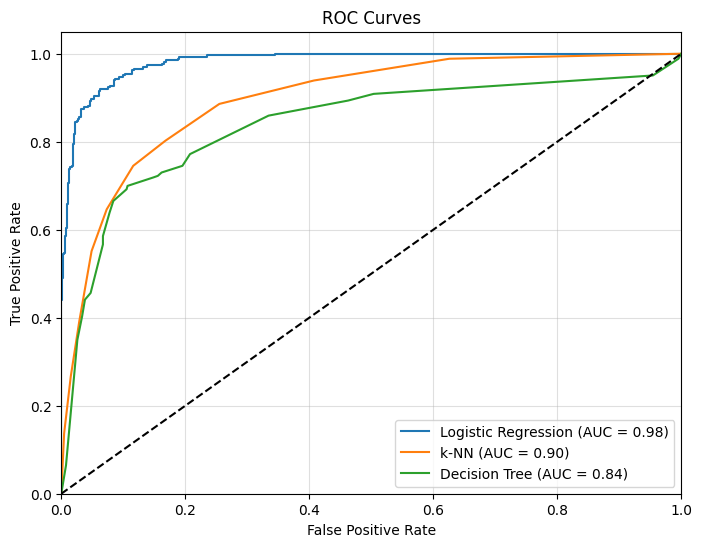

In [224]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(logreg_fpr, logreg_tpr, label='Logistic Regression (AUC = %0.2f)' % logreg_auc)
plt.plot(knn_fpr, knn_tpr, label='k-NN (AUC = %0.2f)' % knn_auc)
plt.plot(dt_fpr, dt_tpr, label='Decision Tree (AUC = %0.2f)' % dt_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid(alpha=0.4)
plt.show()


<hr style="border: 2px solid red; border-radius: 50%;">

## Classifying not yet rated hospitals.

In [227]:
# Read the 'not_yet_rated.csv' dataset
not_rated_df = pd.read_csv(r'not_yet_rated.csv')


In [228]:
not_rated_df.head(5)

Provider ID Hospital Ownership Emergency Services  \
0       520139          Voluntary                Yes   
1       520189         Government                Yes   
2       370029         Government                 No   
3       370032             Others                Yes   
4       370036         Government                Yes   

   Mortality national comparison  Safety of care national comparison  \
0                              1                                   1   
1                              2                                   1   
2                              1                                   1   
3                              1                                   2   
4                              1                                   1   

   Readmission national comparison  Patient experience national comparison  \
0                                2                                       2   
1                                2                                       2   
2                                1                                       1   
3                                1                                       0   
4                                1                                       1   

   Effectiveness of care national comparison  \
0                                          2   
1                                          2   
2                                          1   
3                                          1   
4                                          0   

   Timeliness of care national comparison  \
0                                       2   
1                                       2   
2                                       2   
3                                       1   
4                                       2   

   Efficient use of medical imaging national comparison  ...  \
0                                                  1     ...   
1                                                  1     ...   
2                                                  1     ...   
3                                                  1     ...   
4                                                  1     ...   

   SAFETY_HAI_3_SIR_Score  SAFETY_HAI_4_SIR_Score  SAFETY_HAI_5_SIR_Score  \
0                -0.37100               -1.278000                0.000000   
1                -1.16900                0.000000               -0.987212   
2                -0.96398               -0.871177               -0.987212   
3                 0.00000               -0.871177               -0.987212   
4                -0.96398               -0.871177               -0.987212   

   SAFETY_HAI_6_SIR_Score  MED_OP_10_Score  MED_OP_11_Score  MED_OP_13_Score  \
0                -0.56600        -3.100000        -0.500000        -6.100000   
1                -0.83400        -6.700000        -0.300000        -5.400000   
2                 0.00000       -18.700000       -13.900000        -4.716942   
3                -0.92400       -10.900000        -2.700000        -1.100000   
4                -0.84197        -8.692897        -2.936245        -4.716942   

   MED_OP_14_Score  MED_OP_8_Score  MED_OP_9_Score  
0        -2.900000      -41.000000       -6.100000  
1        -1.900000      -41.100000       -5.300000  
2        -2.964405      -39.964766       -8.300000  
3        -4.500000      -53.200000      -10.500000  
4         0.000000      -39.964766       -9.144957  

[5 rows x 86 columns]

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Preparing the data for model.

In [238]:
demographic_features = ['Provider ID','Hospital Name',
 'Address',
 'City',
 'State',
 'ZIP Code',
 'County Name',
 'Phone Number']

In [239]:
df_model = not_rated_df.copy()

In [243]:
existing_cols = df_model.columns.intersection(demographic_features)

In [245]:
df_model = df_model.drop(columns=existing_cols)

In [246]:
## Empty means all the features are dropped.
[col for col in demographic_features if col in df_model.columns.to_list()]

[]

<hr style="border: 1px solid yellow; border-radius: 50%;">

#### Dropping the unnecessary columns.

In [247]:
df_model.columns

Index(['Hospital Ownership', 'Emergency Services',
       'Mortality national comparison', 'Safety of care national comparison',
       'Readmission national comparison',
       'Patient experience national comparison',
       'Effectiveness of care national comparison',
       'Timeliness of care national comparison',
       'Efficient use of medical imaging national comparison',
       'MORT_30_AMI_Score', 'MORT_30_CABG_Score', 'MORT_30_COPD_Score',
       'MORT_30_HF_Score', 'MORT_30_PN_Score', 'MORT_30_STK_Score',
       'rating_group', 'READM_30_AMI_Score', 'READM_30_CABG_Score',
       'READM_30_COPD_Score', 'READM_30_HF_Score', 'READM_30_HIP_KNEE_Score',
       'READM_30_HOSP_WIDE_Score', 'READM_30_PN_Score', 'READM_30_STK_Score',
       'TIME_OP_21_Score', 'TIME_OP_5_Score', 'EFF_EDV_Score',
       'EFF_ED_1b_Score', 'EFF_ED_2b_Score', 'EFF_IMM_2_Score',
       'EFF_IMM_3_OP_27_FAC_ADHPCT_Score', 'EFF_OP_18b_Score',
       'EFF_OP_20_Score', 'EFF_OP_22_Score', 'EFF_OP_29_Score'

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Mapping the Ratings.

- 1, 2, and 3 will be 0.
- 4, and 5 will be 1.

In [251]:
map_ratings = lambda x: 0 if x == 1 or x == 2 or x == 3 else 1

In [252]:
for i in [1, 2, 1, 3, 2, 5, 4]:
    print(map_ratings(i))

0
0
0
0
0
1
1


<hr style="border: 1px solid yellow; border-radius: 50%;">

### Converting datatypes to categorical variables.

In [253]:
nominal_categorical_features = [
    'Hospital Ownership', 'Emergency Services'
]

In [254]:
ordinal_categorical_features = [
    'Mortality national comparison', 'Safety of care national comparison',
    'Readmission national comparison', 'Patient experience national comparison', 'Effectiveness of care national comparison',
    'Timeliness of care national comparison', 'Efficient use of medical imaging national comparison'
]

In [255]:
df_model[nominal_categorical_features] = df_model[nominal_categorical_features].astype('category')

In [256]:
ratings_category = [2, 1, 0]

In [257]:
ratings_category_order = pd.CategoricalDtype(ratings_category, ordered=True)

In [258]:
df_model[ordinal_categorical_features] = df_model[ordinal_categorical_features].astype(ratings_category_order)

In [259]:
display_series_as_html(df_model.dtypes)

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Predicting using logistic regression.

In [264]:
predictions = tuned_log_reg_pipeline.predict(df_model)

In [368]:
not_rated_df['hospital_overall_rating_pred'] = pd.Series(predictions, name="Hospital overall rating Preds")

In [369]:
not_rated_df[['Provider ID', 'hospital_overall_rating_pred']]

Provider ID  hospital_overall_rating_pred
0       520139                             1
1       520189                             1
2       370029                             0
3       370032                             0
4       370036                             0
5       370037                             0

In [372]:
not_rated_df[['Provider ID', 'Hospital Ownership','hospital_overall_rating_pred']]

Provider ID Hospital Ownership  hospital_overall_rating_pred
0       520139          Voluntary                             1
1       520189         Government                             1
2       370029         Government                             0
3       370032             Others                             0
4       370036         Government                             0
5       370037          Voluntary                             0

<hr style="border: 1px solid yellow; border-radius: 50%;">

## Identifying areas of improvement.

In [281]:
coefs = tuned_log_reg_pipeline['log_reg'].coef_

In [321]:
len(coefs[0])

86

In [331]:
not_rated_df

Provider ID Hospital Ownership Emergency Services  \
0       520139          Voluntary                Yes   
1       520189         Government                Yes   
2       370029         Government                 No   
3       370032             Others                Yes   
4       370036         Government                Yes   
5       370037          Voluntary                Yes   

   Mortality national comparison  Safety of care national comparison  \
0                              1                                   1   
1                              2                                   1   
2                              1                                   1   
3                              1                                   2   
4                              1                                   1   
5                              1                                   2   

   Readmission national comparison  Patient experience national comparison  \
0                                2                                       2   
1                                2                                       2   
2                                1                                       1   
3                                1                                       0   
4                                1                                       1   
5                                0                                       1   

   Effectiveness of care national comparison  \
0                                          2   
1                                          2   
2                                          1   
3                                          1   
4                                          0   
5                                          1   

   Timeliness of care national comparison  \
0                                       2   
1                                       2   
2                                       2   
3                                       1   
4                                       2   
5                                       1   

   Efficient use of medical imaging national comparison  ...  \
0                                                  1     ...   
1                                                  1     ...   
2                                                  1     ...   
3                                                  1     ...   
4                                                  1     ...   
5                                                  0     ...   

   SAFETY_HAI_4_SIR_Score  SAFETY_HAI_5_SIR_Score  SAFETY_HAI_6_SIR_Score  \
0               -1.278000                0.000000                -0.56600   
1                0.000000               -0.987212                -0.83400   
2               -0.871177               -0.987212                 0.00000   
3               -0.871177               -0.987212                -0.92400   
4               -0.871177               -0.987212                -0.84197   
5               -0.871177               -1.179000                -0.68600   

   MED_OP_10_Score  MED_OP_11_Score  MED_OP_13_Score  MED_OP_14_Score  \
0        -3.100000        -0.500000        -6.100000        -2.900000   
1        -6.700000        -0.300000        -5.400000        -1.900000   
2       -18.700000       -13.900000        -4.716942        -2.964405   
3       -10.900000        -2.700000        -1.100000        -4.500000   
4        -8.692897        -2.936245        -4.716942         0.000000   
5       -17.900000        -7.100000        -4.000000        -2.500000   

   MED_OP_8_Score  MED_OP_9_Score  hospital_overall_rating_prediction  
0      -41.000000       -6.100000                                   1  
1      -41.100000       -5.300000                                   1  
2      -39.964766       -8.300000                                   0  
3      -53.200000      -10.500000                                   0  
4      -39.964766       -9.144957           

In [337]:
col_names = not_rated_df.drop(columns='Provider ID').columns

In [338]:
coefficients_df = pd.DataFrame({'Feature': col_names, 'Coefficient': coefs[0]})

In [341]:
positive_coefficients_filter = coefficients_df['Coefficient'] >= 0
negative_coefficients_filter = coefficients_df['Coefficient'] < 0

In [343]:
positive_coefficients_df = coefficients_df[positive_coefficients_filter]
negative_coefficients_df = coefficients_df[negative_coefficients_filter]

In [346]:
positive_coefficients_df = positive_coefficients_df.sort_values(by="Coefficient", ascending=False)

In [349]:
negative_coefficients_df = negative_coefficients_df.sort_values(by="Coefficient")

In [366]:
positive_coefficients_df.head(10)['Feature'].tolist()

['Patient experience national comparison',
 'SAFETY_PSI_14_POSTOP_DEHIS_Score',
 'SAFETY_PSI_4_SURG_COMP_Score',
 'READM_30_HF_Score',
 'Readmission national comparison',
 'READM_30_HIP_KNEE_Score',
 'SAFETY_COMP_HIP_KNEE_Score',
 'EXP_H_COMP_7_STAR_RATING_Score',
 'READM_30_COPD_Score',
 'EXP_H_STAR_RATING_Score']

<hr style="border: 1px solid yellow; border-radius: 50%;">

### Recommendations.

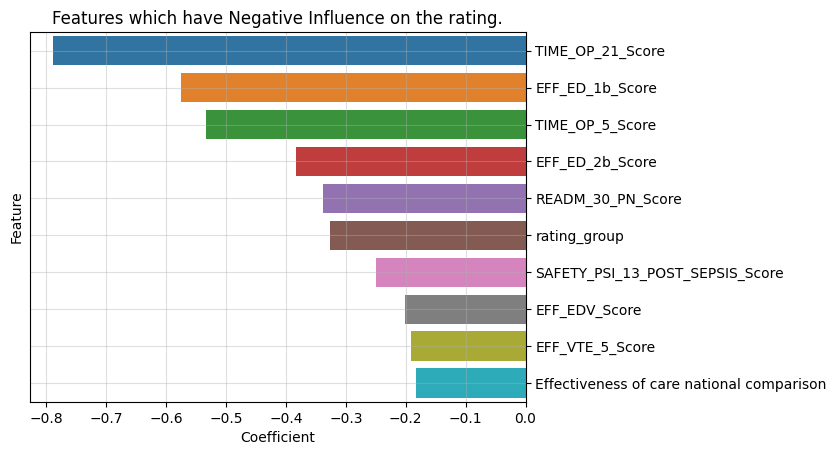

In [378]:
ax = sns.barplot(negative_coefficients_df.head(10), x="Coefficient", y="Feature")
ax.set_title("Features which have Negative Influence on the rating.")
ax.yaxis.tick_right()
ax.grid(alpha=0.4)

Top 10 features which have the most negative influence on the hospital ratings.
1. 'TIME_OP_21_Score'
2. 'EFF_ED_1b_Score'
3. 'TIME_OP_5_Score'
4. 'EFF_ED_2b_Score'
5. 'READM_30_PN_Score'
6. 'rating_group'
7. 'SAFETY_PSI_13_POST_SEPSIS_Score'
8. 'EFF_EDV_Score'
9. 'EFF_VTE_5_Score'
10. 'Effectiveness of care national comparison'

<hr style="border: 1px solid yellow; border-radius: 50%;">

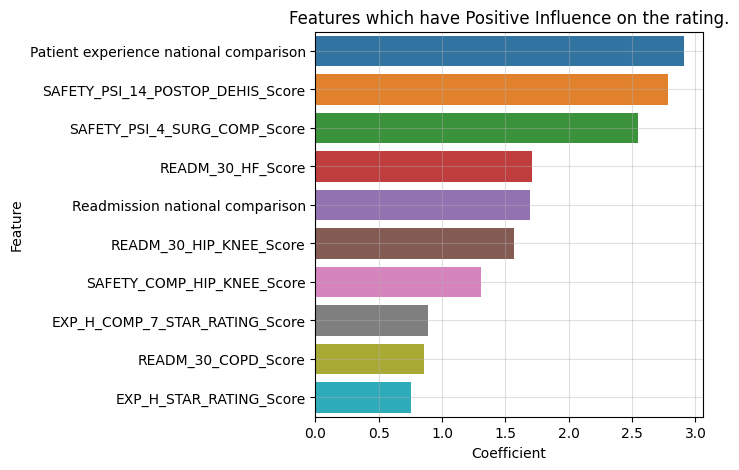

In [377]:
fig, ax = plt.subplots(figsize=(5, 5))
plot = sns.barplot(positive_coefficients_df.head(10), x="Coefficient", y="Feature", ax=ax)
plot.set_title("Features which have Positive Influence on the rating.")
plot.grid(alpha=0.4)
plt.savefig('features_positive_influence.png')

Top 10 features which have Positive influence on the overall hospital rating.
1. 'Patient experience national comparison'
2. 'SAFETY_PSI_14_POSTOP_DEHIS_Score'
3. 'SAFETY_PSI_4_SURG_COMP_Score'
4. 'READM_30_HF_Score'
5. 'Readmission national comparison'
6. 'READM_30_HIP_KNEE_Score'
7. 'SAFETY_COMP_HIP_KNEE_Score'
8. 'EXP_H_COMP_7_STAR_RATING_Score'
9. 'READM_30_COPD_Score'
10. 'EXP_H_STAR_RATING_Score'